**PROJECT: CUSTOMER CHURN PREDICTION**

**GROUP B**

**GROUP MEMBERS:**

Flora Mae Villarin  

Marzieh Mohammadi Kokaneh   

Eduardo Jr Morales  

Haldo Jose Somoza Solis 

Ezgi Tanyeli    
    
Eduardo Roberto Williams Cascante   

#### Libraries and Functions

In [62]:
# importing necessary libraries

import numpy             as np
import pandas            as pd
import random            as rnd
import seaborn           as sns
import matplotlib.pyplot as plt
import statsmodels.api   as sm
import lightgbm          as lgb
import xgboost           as xgb
import shap

from scipy                   import stats

from sklearn.metrics         import confusion_matrix
from sklearn.metrics         import ConfusionMatrixDisplay
from sklearn.preprocessing   import OneHotEncoder
from sklearn.model_selection import train_test_split
from textwrap                import wrap
from xgboost.sklearn         import XGBClassifier
from sklearn.metrics         import roc_auc_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble        import RandomForestClassifier
from sklearn.datasets        import make_classification

from lightgbm                import LGBMClassifier



import warnings
warnings.filterwarnings('ignore')

In [2]:
#Functions
def plot_column_percent(df1, df2, column, palette = 'viridis'):
    """
    Plot the distribution of a specific column for training and test sets.

    Parameters:
    - df1: Pandas DataFrame, training dataset.
    - df2: Pandas DataFrame, test dataset.
    - column: str, the column to plot.

    Returns:
    None
    """
    # Create subplots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

    # Plot for X_train
    sns.countplot(data=df1, x=column, ax=axes[0], palette='viridis')
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Count')
    axes[0].set_title(f'{column} Distribution - Train')

    # Add percentages to the plot
    total_train = df1.shape[0]
    for p in axes[0].patches:
        percentage = f"{p.get_height() / total_train * 100:.2f}%"
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        axes[0].annotate(percentage, (x, y), ha='center', va='bottom')

    # Plot for X_test
    sns.countplot(data=df2, x=column, ax=axes[1], palette='viridis')
    axes[1].set_xlabel(column)
    axes[1].set_ylabel('Count')
    axes[1].set_title(f'{column} Distribution - Test')

    # Add percentages to the plot
    total_test = df2.shape[0]
    for p in axes[1].patches:
        percentage = f"{p.get_height() / total_test * 100:.2f}%"
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        axes[1].annotate(percentage, (x, y), ha='center', va='bottom')

    # Adjust layout
    plt.tight_layout()
    plt.show()


def convert_columns_to_object(dataframe, columns):
    """
    Convert specified columns in the DataFrame to 'object' data type.

    Parameters:
    - dataframe: DataFrame
    - columns: list of str, names of columns to be converted

    Returns:
    - None (modifies the DataFrame in place)
    """
    dataframe[columns] = dataframe[columns].astype("object")

from sklearn.preprocessing import OneHotEncoder

# One Hot Encoding for Categorical Variables
def OHE(dataframe, columns):
    """
    Perform one-hot encoding for specified categorical columns in the DataFrame.

    Parameters:
    - dataframe: DataFrame
    - columns: list of str, names of categorical columns to be one-hot encoded

    Returns:
    - DataFrame: New DataFrame with one-hot encoded columns
    """
    # Create an instance of the OneHotEncoder
    encoder = OneHotEncoder(sparse=False, drop="first")  # drop="first" to avoid multicollinearity
    
    # Fit and transform the specified columns
    encoded_data = encoder.fit_transform(dataframe[columns])
    
    # Create a DataFrame with the one-hot encoded data
    encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(columns))
    
    # Set the index of encoded_df to be the same as the original DataFrame
    encoded_df.index = dataframe.index
    
    # Concatenate the one-hot encoded DataFrame beside the original DataFrame
    dataframe = pd.concat([dataframe, encoded_df], axis=1)
    
    # Drop the original columns from the original DataFrame
    dataframe.drop(columns=columns, inplace=True)
    
    return dataframe


**ABOUT THE DATASET**

This dataset contains information of telecom companies customers and it was designed for trying to predict which customers are at high risk of churn, understanding that customer churn is defined as when customers or subscribers discontinue doing business with a firm or service.

Analysis is centered around identifying the characteristics and behaviors of telecom customers with a higher likelihood of leaving the platform. The primary objective is to uncover significant patterns and trends through Exploratory Data Analysis (EDA). Subsequently, predictive analytics techniques will be employed to pinpoint customers who are at a heightened risk of churn.

**DATA DICTIONARY**

**customerID** --> A unique ID that identifies each customer

**gender** --> The customer’s gender: Male, Female

**SeniorCitizen** --> Indicates if the customer is 65 or older: Yes (1), No (0)

**Partner** --> Indicates if the customer is a partner: Yes, No

**Dependents** --> Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.

**tenure** --> Indicates the total amount of months that the customer has been with the company

**PhoneService** --> Indicates if the customer subscribes to home phone service with the company: Yes, No

**MultipleLines** --> Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No, No Phone Service

**InternetService** --> Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic

**OnlineSecurity** --> Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No, No Internet Service

**OnlineBackup** --> Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No, No Internet Service

**DeviceProtection** --> Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No, No Internet Service

**TechSupport** --> Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No, No Internet Service

**StreamingTV** --> Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No, No Internet Service

**StreamingMovies** --> Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No, No Internet Service

**Contract** --> Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year

**PaperlessBilling** --> Indicates if the customer has chosen paperless billing: Yes, No

**PaymentMethod** --> Indicates how the customer pays their bill: Bank transfer, Credit card, Electronic check, Mailed check

**MonthlyCharges** --> Indicates the customer’s current total monthly charge for all their services from the company

**TotalCharges** --> Indicates the customer’s total charges

**Churn** --> Yes = the customer left the company this quarter. No = the customer remained with the company.

#### Importing the Dataset

In [4]:
# importing csv file
df = pd.read_csv(r"C:\Customer_churn\customer_churn.csv")

In [5]:
# We have 7043 rows with 21 column in the data
# shape of the data
df.shape

(7043, 21)

In [6]:
# Check if the 'customerID' column has unique values
is_unique = df['customerID'].nunique() == len(df['customerID'])

# Print a message based on the uniqueness of the 'customerID' column
if is_unique:
    print("The 'customerID' column has unique values.")
else:
    print("The 'customerID' column has duplicate values.")

The 'customerID' column has unique values.


In [7]:
# Set 'customerID' as the index
df.set_index('customerID', inplace=True)

#### Splitting Data into Train and Test

In [8]:
# Splitting the df into train and test
X = df.drop('Churn', axis=1)  # Features (input variables)
y = df['Churn']  # Target variable (what you want to predict)

# Mapping target variable as 1 (yes) and 0 (no)
y = y.map({'Yes': 1, 'No': 0})


# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1003)

# Check the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (4930, 19)
Shape of X_test: (2113, 19)
Shape of y_train: (4930,)
Shape of y_test: (2113,)


In [9]:
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

In [10]:
# Checking out train data
# Almost all the columns are object
# Display information about the training set
print("Training Set Info:")
print(X_train.info())
print(y_train.value_counts())

Training Set Info:
<class 'pandas.core.frame.DataFrame'>
Index: 4930 entries, 1304-BCCFO to 3891-PUQOD
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            4930 non-null   object 
 1   SeniorCitizen     4930 non-null   int64  
 2   Partner           4930 non-null   object 
 3   Dependents        4930 non-null   object 
 4   tenure            4930 non-null   int64  
 5   PhoneService      4930 non-null   object 
 6   MultipleLines     4930 non-null   object 
 7   InternetService   4930 non-null   object 
 8   OnlineSecurity    4930 non-null   object 
 9   OnlineBackup      4930 non-null   object 
 10  DeviceProtection  4930 non-null   object 
 11  TechSupport       4930 non-null   object 
 12  StreamingTV       4930 non-null   object 
 13  StreamingMovies   4930 non-null   object 
 14  Contract          4930 non-null   object 
 15  PaperlessBilling  4930 non-null   object 
 16  PaymentMethod

In [11]:
# Checking out test data
# Almost all the columns are object
# Display information about the test set
print("\nTest Set Info:")
print(X_test.info())
print(y_test.value_counts())


Test Set Info:
<class 'pandas.core.frame.DataFrame'>
Index: 2113 entries, 9092-GDZKO to 6664-FPDAC
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            2113 non-null   object 
 1   SeniorCitizen     2113 non-null   int64  
 2   Partner           2113 non-null   object 
 3   Dependents        2113 non-null   object 
 4   tenure            2113 non-null   int64  
 5   PhoneService      2113 non-null   object 
 6   MultipleLines     2113 non-null   object 
 7   InternetService   2113 non-null   object 
 8   OnlineSecurity    2113 non-null   object 
 9   OnlineBackup      2113 non-null   object 
 10  DeviceProtection  2113 non-null   object 
 11  TechSupport       2113 non-null   object 
 12  StreamingTV       2113 non-null   object 
 13  StreamingMovies   2113 non-null   object 
 14  Contract          2113 non-null   object 
 15  PaperlessBilling  2113 non-null   object 
 16  PaymentMethod   

In [12]:
# Total charges column seems object but it should be float
X_train['TotalCharges'] = pd.to_numeric(X_train['TotalCharges'], errors='coerce')
X_test['TotalCharges'] = pd.to_numeric(X_test['TotalCharges'], errors='coerce')

In [13]:
# Check again for the null values - Total Charges column has 11 null values
print('TotalCharges Nulls- Train: ', X_train['TotalCharges'].isnull().sum())
print('TotalCharges Nulls- Train: ', X_test['TotalCharges'].isnull().sum())

TotalCharges Nulls- Train:  9
TotalCharges Nulls- Train:  2


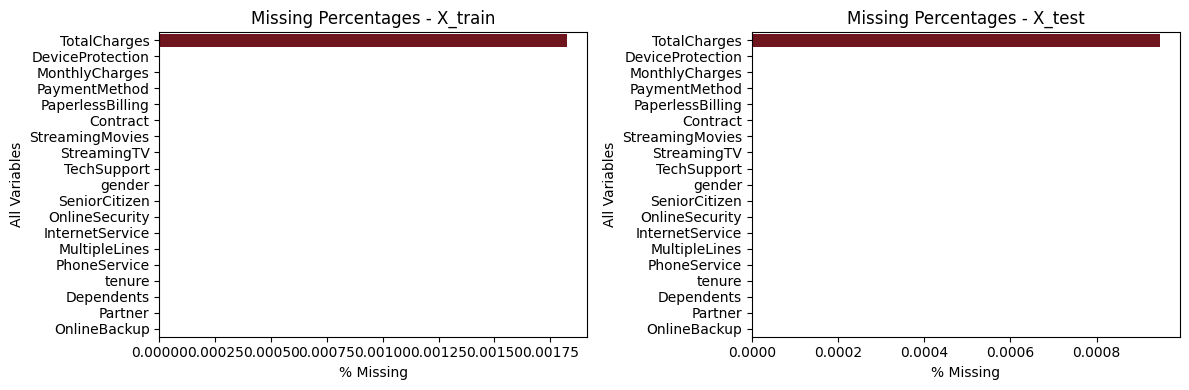

In [14]:
# Plotting the null values in the columns
# Calculate the missing data percentages for X_train
missing_data_train = X_train.isna().mean()
missing_data_train = pd.DataFrame({'vars': missing_data_train.index, 'missing': missing_data_train.values})
missing_data_train = missing_data_train.sort_values(by='missing', ascending=False)

# Calculate the missing data percentages for X_test
missing_data_test = X_test.isna().mean()
missing_data_test = pd.DataFrame({'vars': missing_data_test.index, 'missing': missing_data_test.values})
missing_data_test = missing_data_test.sort_values(by='missing', ascending=False)

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot for X_train
sns.barplot(ax=axes[0], x='missing', y='vars', data=missing_data_train, palette='Reds_r', order=missing_data_train['vars'])
axes[0].set_xlabel('% Missing')
axes[0].set_ylabel('All Variables')
axes[0].set_title('Missing Percentages - X_train')

# Plot for X_test
sns.barplot(ax=axes[1], x='missing', y='vars', data=missing_data_test, palette='Reds_r', order=missing_data_test['vars'])
axes[1].set_xlabel('% Missing')
axes[1].set_ylabel('All Variables')
axes[1].set_title('Missing Percentages - X_test')

# Adjust layout
plt.tight_layout()
plt.show()

In [15]:
# Filling the null values in Total_Charges column with train mean
total_charges_median = X_train['TotalCharges'].median()

# Fill null values in 'Total_Charges' column with the mean in train and test by using train mean
X_train['TotalCharges'].fillna(total_charges_median, inplace=True)
X_test['TotalCharges'].fillna(total_charges_median, inplace=True)

** **
Additionally, among the continuous variables, namely 'Tenure' and 'SeniorCitizen' are in 'int' format. Considering SeniorCitizen's nature, it can be more appropriately represented as a categorical variable.

'MonthlyCharges' and 'TotalCharges' are in 'float' format. 

** **

In [16]:
# Changing the type of the SeniorCitizen column
X_train['SeniorCitizen'] = X_train['SeniorCitizen'].apply(lambda x: 'Yes' if x == 1 else 'No').astype('object')
X_test['SeniorCitizen'] = X_test['SeniorCitizen'].apply(lambda x: 'Yes' if x == 1 else 'No').astype('object')

In [17]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4930 entries, 1304-BCCFO to 3891-PUQOD
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            4930 non-null   object 
 1   SeniorCitizen     4930 non-null   object 
 2   Partner           4930 non-null   object 
 3   Dependents        4930 non-null   object 
 4   tenure            4930 non-null   int64  
 5   PhoneService      4930 non-null   object 
 6   MultipleLines     4930 non-null   object 
 7   InternetService   4930 non-null   object 
 8   OnlineSecurity    4930 non-null   object 
 9   OnlineBackup      4930 non-null   object 
 10  DeviceProtection  4930 non-null   object 
 11  TechSupport       4930 non-null   object 
 12  StreamingTV       4930 non-null   object 
 13  StreamingMovies   4930 non-null   object 
 14  Contract          4930 non-null   object 
 15  PaperlessBilling  4930 non-null   object 
 16  PaymentMethod     4930 non-null 

In [18]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2113 entries, 9092-GDZKO to 6664-FPDAC
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            2113 non-null   object 
 1   SeniorCitizen     2113 non-null   object 
 2   Partner           2113 non-null   object 
 3   Dependents        2113 non-null   object 
 4   tenure            2113 non-null   int64  
 5   PhoneService      2113 non-null   object 
 6   MultipleLines     2113 non-null   object 
 7   InternetService   2113 non-null   object 
 8   OnlineSecurity    2113 non-null   object 
 9   OnlineBackup      2113 non-null   object 
 10  DeviceProtection  2113 non-null   object 
 11  TechSupport       2113 non-null   object 
 12  StreamingTV       2113 non-null   object 
 13  StreamingMovies   2113 non-null   object 
 14  Contract          2113 non-null   object 
 15  PaperlessBilling  2113 non-null   object 
 16  PaymentMethod     2113 non-null 

According to the preliminary view, we found the dataset contains these categorical features: customerID, gender, SeniorCitizen, Partner, Dependents, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract PaperlessBilling and PaymentMethod.

In addition, we found tenure feature which is a discrete value, and two continuous values: MonthlyCharges and TotalCharges.

The target variable is the Churn column.

#### EDA on Target (Churn)

The 'CHURN' column provides information about the customers who have discontinued their subscription within the last month. Regarding to train data, approximately 27% of the customer base decided to discontinue their engagement with the platform in the previous month.

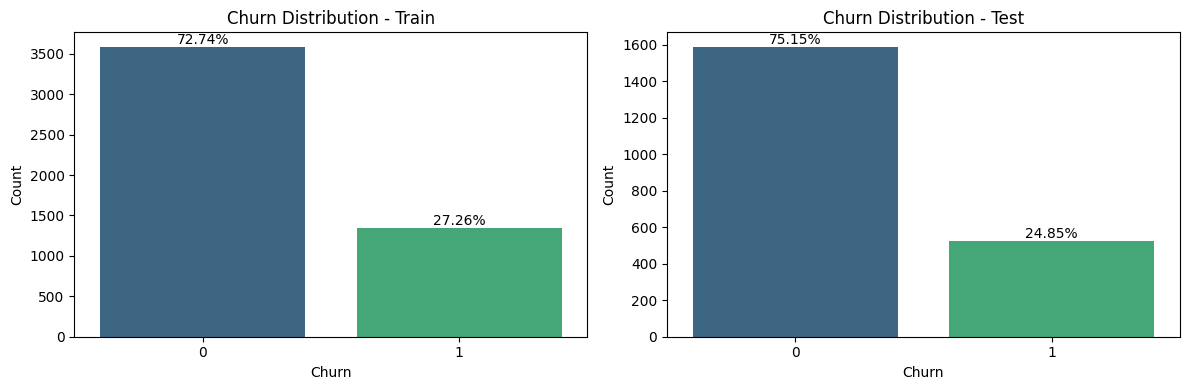

In [19]:
# Target Variable Distribution
plot_column_percent(y_train, y_test, 'Churn')

In our train dataset, 73% of customers do not churn. The data exhibits a clear skewness, as we would anticipate a substantial majority of customers not churning. It is crucial to be mindful of this skewness during the modeling process, as it could potentially result in a significant number of false negatives. Strategies for addressing skewness in the data will be explored in the modeling section.

#### EDA on Categoric Variables

In [21]:
def plot_sur(df: pd.DataFrame, col: str, target: str, title: str, palette:str) -> None:
    survival = (df[[col,target]].groupby(col)[target].mean()*100).reset_index()
    survival = pd.merge(survival,df[col].value_counts(),how="right",on=col).sort_values(by="count",ascending=False)
    
    plt.figure(figsize=(15,10))
    plt.subplot(2,2,1)
    sns.countplot(x = col, data=df, palette = palette, order=df[col].value_counts().to_dict().keys())
    for p, count in enumerate(df[col].value_counts().to_dict().values(),0):
        plt.text(p-len(survival[target])/30, count + 8, count, color='black', fontsize=12)
    plt.title(f"{title} Distribution", color='black', fontsize=12) 
    plt.yticks([])
    plt.box(False)

    plt.subplot(2,2,2)
    sns.barplot(x = col,y=target, data=survival, palette = palette, order = df[col].value_counts().to_dict().keys())
    
    for p, count in enumerate(survival[target].values,0):
        plt.text(p-len(survival[target])/20, count+1, f"{count:.1f}%", color='black', fontsize=12)
    plt.title(f"The effect of {title} on survivability.", color='black', fontsize=11) 
    plt.yticks([])
    plt.box(False)
    plt.show()

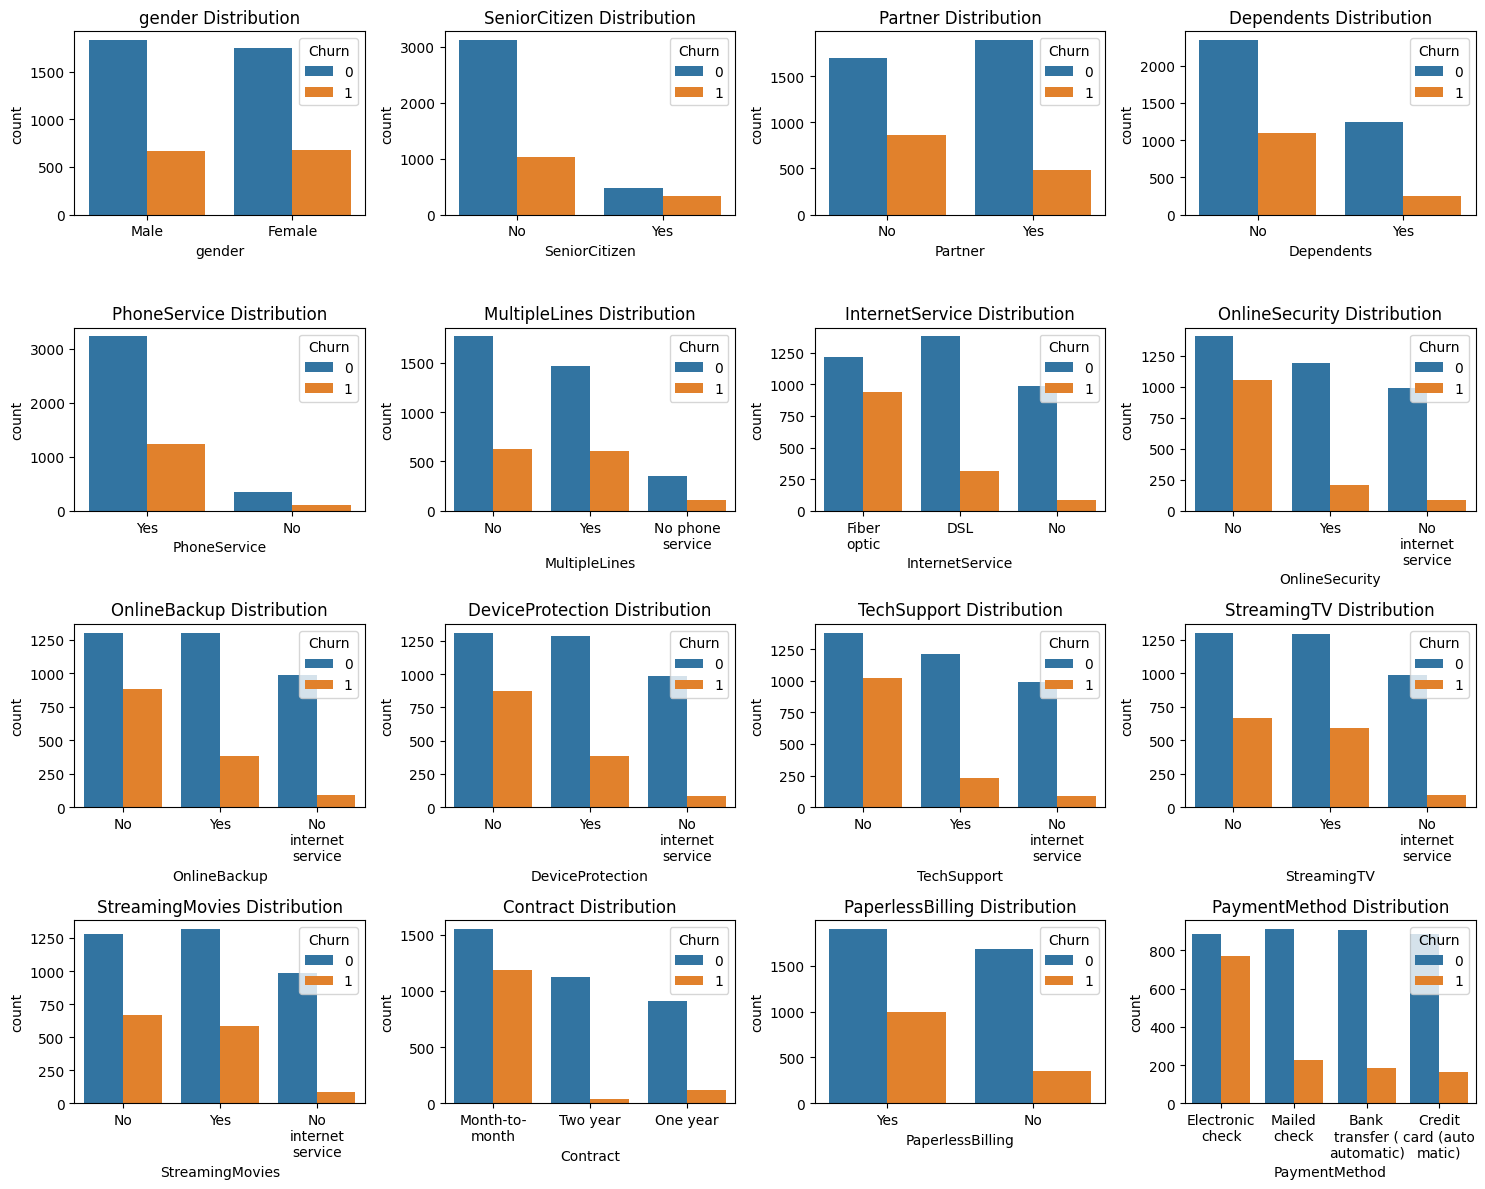

In [22]:
# Select all columns of type 'object'
object_columns = X_train.select_dtypes(include=['object']).columns

# Visualization with Catplot
num_columns = len(object_columns)
num_cols_per_row = 4
num_rows = -(-num_columns // num_cols_per_row)  # Calculate the number of rows using ceil division

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols_per_row, figsize=(15, 3 * num_rows))

# Concatenate X_train and y_train based on the index
data_combined = pd.concat([X_train, y_train['Churn']], axis=1)

# Loop through each object column for visualization
for i, column in enumerate(object_columns, start=0):
    row_idx, col_idx = divmod(i, num_cols_per_row)
    
    # Create a countplot for the current column
    sns.countplot(x=column, hue='Churn', data=data_combined, ax=axes[row_idx, col_idx], order=X_train[column].value_counts().index)
    axes[row_idx, col_idx].set_title(f'{column} Distribution')
    
    # Adjust x-axis labels to two lines
    axes[row_idx, col_idx].tick_params(axis='x', labelrotation=0)  # Rotate x-axis labels
    
    # Apply text wrapping to x-axis labels
    labels = axes[row_idx, col_idx].get_xticklabels()
    axes[row_idx, col_idx].set_xticklabels(['\n'.join(wrap(label.get_text(), 10)) for label in labels])

# Remove empty subplots
for i in range(len(object_columns), num_rows * num_cols_per_row):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()


**INSIGHTS** 
* Gender - Approximately half of the customers in our dataset are male, with the remaining half being female. Churn rates are approximately equal for both males and females.
* Senior Citizen - The majority of the customers in the dataset are not senior citizens. The likelihood of churn is higher among senior citizens than younger citizens.
* Partner & Dependents - Approximately 50% of the customers have a partner, whereas only 30% of the total customers have dependents. Customers with partners and dependents exhibit a lower churn rate compared to those without such familial associations.
* Internet Servie - The churn rate significantly increases for customers subscribed to Fiber Optic Internet Services.
* Customers without essential services such as OnlineSecurity, OnlineBackup, DeviceProtection and TechSupport have shown a higher likelihood of leaving the platform in the previous month.
* Contract - The majority of customers are enrolled in month-to-month contracts, while an equal number of customers have opted for 1-year and 2-year contracts. A higher percentage of customers with monthly subscriptions have churned compared to those with one or two-year contracts.
* PaperlessBilling - The churn rate is elevated among customers who opt for paperless billing.
* PaymentMethod - Customers utilizing the Electronic Check payment method are more likely to leave the platform than those using other payment options.

#### EDA on Numerical Variables

1- Tenure

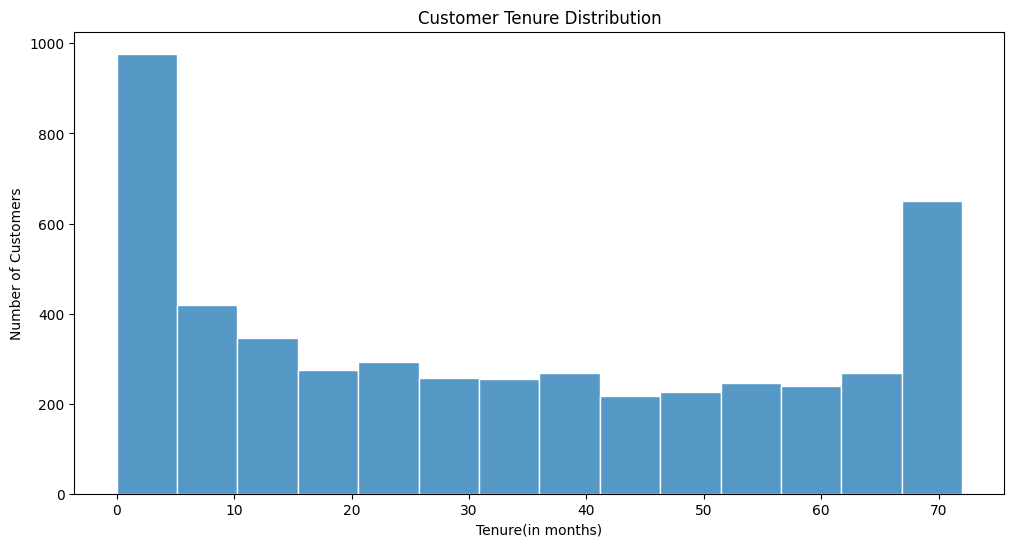

In [23]:
plt.figure(figsize=(12, 6))

# Histogram
sns.histplot(x=X_train['tenure'], palette='pastel6', kde=False, edgecolor='white')

plt.ylabel('Number of Customers')
plt.xlabel('Tenure(in months)')
plt.title('Customer Tenure Distribution')

plt.show()

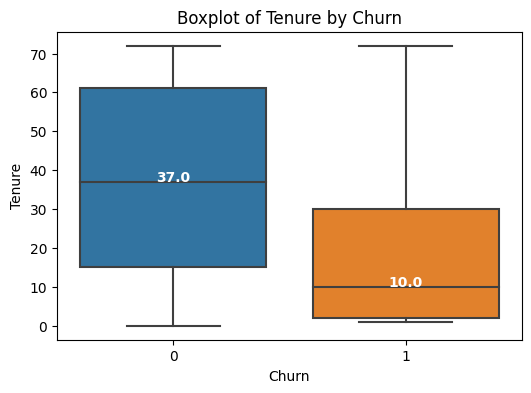

In [24]:
# Set plot size
plt.figure(figsize=(6, 4))

# Seaborn boxplot with Churn as hue
ax = sns.boxplot(x=y_train['Churn'], y=X_train['tenure'])  # Assuming 'tenure' is the column name in X_train
plt.xlabel("Churn")
plt.ylabel("Tenure")
plt.title("Boxplot of Tenure by Churn")

# Annotate the medians of the two boxplots
medians = X_train.groupby([y_train['Churn']])['tenure'].median().values
median_labels = [str(np.round(s, 2)) for s in medians]

pos = range(len(medians))
for tick, label in zip(pos, ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.2, median_labels[tick], 
            horizontalalignment='center', color='w', weight='bold')

plt.show()


Tenure - Ten months is the median tenure for customers who have churned. As evident from the plot, customers who do not churn tend to have a longer tenure with the telecom company.

2- MonthlyCharges

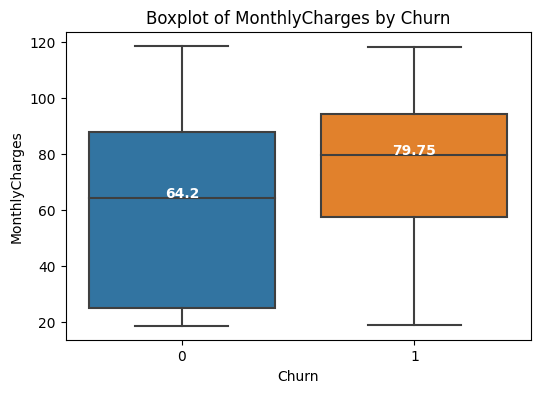

In [25]:
# Set plot size
plt.figure(figsize=(6, 4))

# Seaborn boxplot with Churn as hue
ax = sns.boxplot(x=y_train['Churn'], y=X_train['MonthlyCharges'])  # Assuming 'tenure' is the column name in X_train
plt.xlabel("Churn")
plt.ylabel("MonthlyCharges")
plt.title("Boxplot of MonthlyCharges by Churn")

# Annotate the medians of the two boxplots
medians = X_train.groupby([y_train['Churn']])['MonthlyCharges'].median().values
median_labels = [str(np.round(s, 2)) for s in medians]

pos = range(len(medians))
for tick, label in zip(pos, ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.2, median_labels[tick], 
            horizontalalignment='center', color='w', weight='bold')

plt.show()

MonthlyCharges - Customers when faced with higher monthly charges tend to churn, specifically with an approximately median of 80.

3- TotalCharges

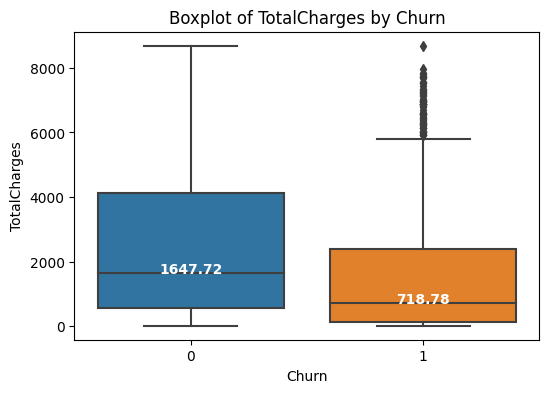

In [26]:
# Set plot size
plt.figure(figsize=(6, 4))

# Seaborn boxplot with Churn as hue
ax = sns.boxplot(x=y_train['Churn'], y=X_train['TotalCharges'])  # Assuming 'tenure' is the column name in X_train
plt.xlabel("Churn")
plt.ylabel("TotalCharges")
plt.title("Boxplot of TotalCharges by Churn")

# Annotate the medians of the two boxplots
medians = X_train.groupby([y_train['Churn']])['TotalCharges'].median().values
median_labels = [str(np.round(s, 2)) for s in medians]

pos = range(len(medians))
for tick, label in zip(pos, ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.2, median_labels[tick], 
            horizontalalignment='center', color='w', weight='bold')

plt.show()

TotalCharges - When comparing median, the total charges for customers who have churned are lower(718.78) than for those who have not churned(1654.8). Interestingly, customers with lower Total Charges more likely to churn.

##### Outlier Detection in Numerical Variables

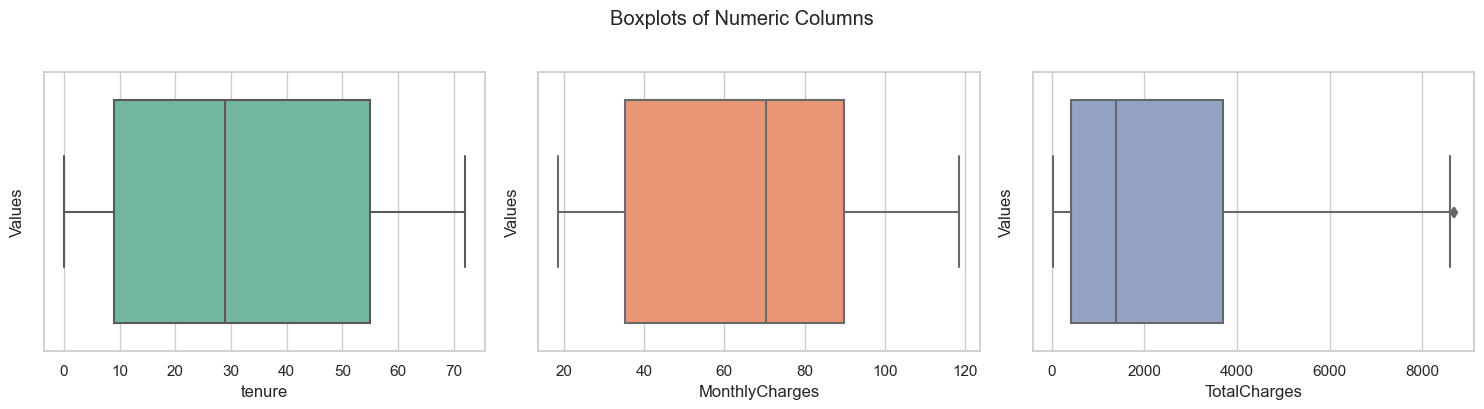

In [27]:
numeric_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Set Seaborn style and color palette
sns.set_theme(style="whitegrid")
custom_palette = sns.color_palette("Set2")  # You can choose a different palette if desired

# Set up subplots
fig, axes = plt.subplots(1, len(numeric_columns), figsize=(15, 4))

# Create boxplots for each numeric column
for i, column in enumerate(numeric_columns):
    sns.boxplot(x=X_train[column], ax=axes[i], color=custom_palette[i])
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Values")

plt.suptitle("Boxplots of Numeric Columns", y=1.02)
plt.tight_layout()
plt.show()


Only TotalCharges column has outliers, I will cap the outliers with the 99.5% quantile.

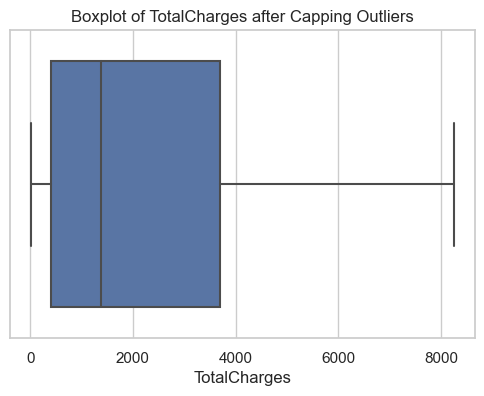

In [28]:
# Identify and cap outliers in the 'TotalCharges' column
total_charges_quantile = X_train['TotalCharges'].quantile(0.995)
X_train['TotalCharges'] = X_train['TotalCharges'].clip(upper=total_charges_quantile)

# Plot the boxplot after capping outliers
plt.figure(figsize=(6, 4))
sns.boxplot(x='TotalCharges', data=X_train)
plt.xlabel("TotalCharges")
plt.title("Boxplot of TotalCharges after Capping Outliers")
plt.show()

#### FEATURE ENGINEERING

In [29]:
# Extraction of year from tenure column
def tenure_year(dataframe):
    conditions = [
        (dataframe["tenure"] >= 0) & (dataframe["tenure"] <= 12),
        (dataframe["tenure"] > 12) & (dataframe["tenure"] <= 24),
        (dataframe["tenure"] > 24) & (dataframe["tenure"] <= 36),
        (dataframe["tenure"] > 36) & (dataframe["tenure"] <= 48),
        (dataframe["tenure"] > 48) & (dataframe["tenure"] <= 60),
        (dataframe["tenure"] > 60) & (dataframe["tenure"] <= 72)
    ]

    choices = ["0-1 Year", "1-2 Year", "2-3 Year", "3-4 Year", "4-5 Year", "5-6 Year"]

    dataframe["Tenure_Year"] = np.select(conditions, choices, default=np.nan)

# Implement the function on dfs
tenure_year(X_train)
tenure_year(X_test)

In [30]:
# Extraction of contract due from contract column
X_train["Contract_Due"] = X_train["Contract"].apply(lambda x: 1 if x in ["One year","Two year"] else 0)
X_test["Contract_Due"] = X_test["Contract"].apply(lambda x: 1 if x in ["One year","Two year"] else 0)

In [31]:
# Derived Feature Based on Protection having 
X_train["AnyProtection"] = X_train.apply(lambda x: 1 if (x["OnlineBackup"] != "Yes") or (x["DeviceProtection"] != "Yes") or (x["TechSupport"] != "Yes") else 0, axis=1)
X_test["AnyProtection"] = X_test.apply(lambda x: 1 if (x["OnlineBackup"] != "Yes") or (x["DeviceProtection"] != "Yes") or (x["TechSupport"] != "Yes") else 0, axis=1)

In [32]:
# Derived Feature Based on total number of active services for each row by checking if the specified services (PhoneService, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies) are marked as "Yes." 
X_train['TotalActiveServices'] = (X_train[['PhoneService', 'InternetService', 'OnlineSecurity',
                                  'OnlineBackup', 'DeviceProtection', 'TechSupport',
                                  'StreamingTV', 'StreamingMovies']] == 'Yes').sum(axis=1)

X_test['TotalActiveServices'] = (X_test[['PhoneService', 'InternetService', 'OnlineSecurity',
                                  'OnlineBackup', 'DeviceProtection', 'TechSupport',
                                  'StreamingTV', 'StreamingMovies']] == 'Yes').sum(axis=1)

In [33]:
# Derived Feature Based on represent whether any streaming service (StreamingTV or StreamingMovies) is active for each row. 
X_train["AnyStreamingService"] = X_train.apply(lambda x: 1 if (x["StreamingTV"] == "Yes") or (x["StreamingMovies"] == "Yes") else 0, axis=1)
X_test["AnyStreamingService"] = X_test.apply(lambda x: 1 if (x["StreamingTV"] == "Yes") or (x["StreamingMovies"] == "Yes") else 0, axis=1)

In [34]:
# Derived Feature indicating whether the payment method is automatic
X_train["AutoPaymentFlag"] = X_train["PaymentMethod"].apply(lambda x: 1 if x in ["Bank transfer (automatic)", "Credit card (automatic)"] else 0)
X_test["AutoPaymentFlag"] = X_test["PaymentMethod"].apply(lambda x: 1 if x in ["Bank transfer (automatic)", "Credit card (automatic)"] else 0)


In [35]:
# Derived Feature calculating the average charges per month
X_train["AvgMonthlyCharges"] = X_train["TotalCharges"] / (X_train["tenure"] + 1)
X_test["AvgMonthlyCharges"] = X_test["TotalCharges"] / (X_test["tenure"] + 1)

In [36]:
# Derived Feature calculating the increase factor between the new average charges and the monthly charges
X_train["ChargesIncreaseFactor"] = X_train["AvgMonthlyCharges"] / X_train["MonthlyCharges"]
X_test["ChargesIncreaseFactor"] = X_test["AvgMonthlyCharges"] / X_test["MonthlyCharges"]

In [37]:
# Derived Feature calculating the average service fee per active service (The "+1" is added to denominator to prevent division by zero errors )
X_train["AvgServiceFeePerActiveService"] = X_train["MonthlyCharges"] / (X_train['TotalActiveServices'] + 1)
X_test["AvgServiceFeePerActiveService"] = X_test["MonthlyCharges"] / (X_test['TotalActiveServices'] + 1)

In [38]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4930 entries, 1304-BCCFO to 3891-PUQOD
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   gender                         4930 non-null   object 
 1   SeniorCitizen                  4930 non-null   object 
 2   Partner                        4930 non-null   object 
 3   Dependents                     4930 non-null   object 
 4   tenure                         4930 non-null   int64  
 5   PhoneService                   4930 non-null   object 
 6   MultipleLines                  4930 non-null   object 
 7   InternetService                4930 non-null   object 
 8   OnlineSecurity                 4930 non-null   object 
 9   OnlineBackup                   4930 non-null   object 
 10  DeviceProtection               4930 non-null   object 
 11  TechSupport                    4930 non-null   object 
 12  StreamingTV                    4930 no

In [39]:
# Convert specified columns to 'object' data type in X_train
convert_columns_to_object(X_train, ["Contract_Due", "AnyProtection", "TotalActiveServices", "AnyStreamingService", "AutoPaymentFlag"])

# Convert specified columns to 'object' data type in X_test
convert_columns_to_object(X_test, ["Contract_Due", "AnyProtection", "TotalActiveServices", "AnyStreamingService", "AutoPaymentFlag"])

In [40]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2113 entries, 9092-GDZKO to 6664-FPDAC
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   gender                         2113 non-null   object 
 1   SeniorCitizen                  2113 non-null   object 
 2   Partner                        2113 non-null   object 
 3   Dependents                     2113 non-null   object 
 4   tenure                         2113 non-null   int64  
 5   PhoneService                   2113 non-null   object 
 6   MultipleLines                  2113 non-null   object 
 7   InternetService                2113 non-null   object 
 8   OnlineSecurity                 2113 non-null   object 
 9   OnlineBackup                   2113 non-null   object 
 10  DeviceProtection               2113 non-null   object 
 11  TechSupport                    2113 non-null   object 
 12  StreamingTV                    2113 no

In [41]:
# Specifying the object columns for one-hot encoding
object_columns = X_train.select_dtypes(include=['object']).columns

# Apply one-hot encoding to X_train
X_train = OHE(X_train, object_columns)

# Apply one-hot encoding to X_test
X_test = OHE(X_test, object_columns)

In [42]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4930 entries, 1304-BCCFO to 3891-PUQOD
Data columns (total 49 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   tenure                                 4930 non-null   int64  
 1   MonthlyCharges                         4930 non-null   float64
 2   TotalCharges                           4930 non-null   float64
 3   AvgMonthlyCharges                      4930 non-null   float64
 4   ChargesIncreaseFactor                  4930 non-null   float64
 5   AvgServiceFeePerActiveService          4930 non-null   float64
 6   gender_Male                            4930 non-null   float64
 7   SeniorCitizen_Yes                      4930 non-null   float64
 8   Partner_Yes                            4930 non-null   float64
 9   Dependents_Yes                         4930 non-null   float64
 10  PhoneService_Yes                       4930 non-null   float64

#### Modelling

In this section, we delve into the internal mechanisms of three prominent boosting algorithms— XGBoost, and LightGBM—specifically examining how they tackle imbalanced data. Boosting algorithms excel in scenarios with imbalanced class distributions due to their ability to adapt and prioritize learning from the minority class.


**XGBoost:**
XGBoost (Extreme Gradient Boosting) is renowned for its effectiveness in handling imbalanced datasets. One key aspect is the incorporation of a hyperparameter called scale_pos_weight, which provides a direct way to control the balance of positive and negative weights, thereby emphasizing the minority class. Additionally, XGBoost's gradient boosting framework inherently adjusts its learning process to allocate more resources to under-represented classes.

**LightGBM:**
LightGBM, another gradient boosting framework, introduces a unique approach to tree-based learning. It utilizes a histogram-based learning method, enabling faster training and efficient handling of large datasets. LightGBM incorporates mechanisms to deal with imbalanced data by incorporating a parameter called scale_pos_weight similar to XGBoost.

* By default, scale_pos_weight hyperparameter is set to 1, implying equal weights for both the majority and minority classes. In our train data we have 3586 non-churned customers and 1344 churned customers. The corresponding scale_pos_weight would be approximately 3586 / 1344, which is around 2.5. This adjustment ensures that the minority class receives two and a half times more weight, thereby having a more significant impact and correction influence compared to errors made on the majority class.

* Two essential points emerge from this adjustment: 

Effect on Performance Metrics:  
Changing the scale_pos_weight not only influences the model's treatment of class imbalance but also has repercussions on various performance metrics such as recall, accuracy, ROC-AUC, and precision scores. This adaptability allows practitioners to fine-tune the model based on the specific requirements of the task at hand. 

Potential Overfitting Concerns: 
While adjusting scale_pos_weight is a powerful tool for addressing class imbalance, caution must be exercised to avoid overfitting the minority class. Extreme values of scale_pos_weight can lead the model to overly prioritize the minority class, potentially resulting in poorer predictions and reduced generalization to unseen data.

In [43]:
y_train.value_counts()

Churn
0        3586
1        1344
Name: count, dtype: int64

##### Handle class imbalance parameter ( scale_pos_weight )

In [44]:
# Get the count of negative and positive examples
count_negative = (y_train['Churn'] == 0).sum()
count_positive = (y_train['Churn'] == 1).sum()

# Calculate the value of scale_pos_weight (formula from XGBoost documentation)
scale_pos_weight = count_negative / count_positive

#### First XGBoost Model With Default Parameters

In [45]:
#XGBoost with default parameters
xgb = XGBClassifier(objective='binary:logistic', random_state=1003, 
                    eval_metric='auc', 
                    scale_pos_weight=scale_pos_weight)
xgb.fit(X_train, y_train)

#prediction
y_pred_xgb = xgb.predict(X_test)

#classification report
print(classification_report(y_test, y_pred_xgb))

#confusion matrix
print(confusion_matrix(y_test, y_pred_xgb, normalize='true'))

              precision    recall  f1-score   support

           0       0.89      0.82      0.85      1588
           1       0.55      0.69      0.61       525

    accuracy                           0.78      2113
   macro avg       0.72      0.75      0.73      2113
weighted avg       0.80      0.78      0.79      2113

[[0.81612091 0.18387909]
 [0.31428571 0.68571429]]


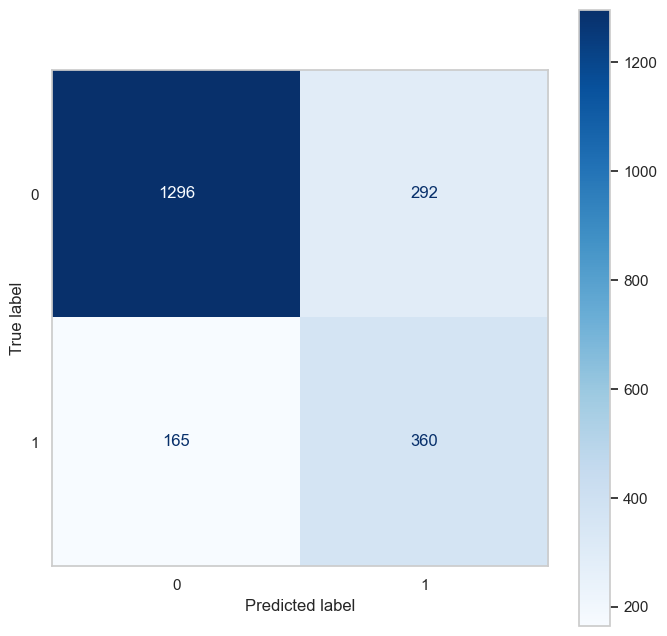

In [46]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb)

fig, ax = plt.subplots(figsize=(8, 8))
ax.grid(False)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb.classes_)
disp.plot(cmap=plt.cm.Blues, ax=ax )
plt.show()

In [47]:
# Probas for train
y_train_xgb_proba = xgb.predict_proba(X_train)[:, 1]  
train_auc = roc_auc_score(y_train, y_train_xgb_proba)
print(f'Train AUC: {train_auc}')

# Probas for test
y_pred_xgb_proba = xgb.predict_proba(X_test)[:, 1]  
test_auc = roc_auc_score(y_test, y_pred_xgb_proba)
print(f'Test AUC: {test_auc}')

Train AUC: 0.9952703386848325
Test AUC: 0.8407412738395108


In [48]:
# Feature Importance
cols = list( X_train.columns)
feature_imp = pd.DataFrame(sorted(zip(xgb.feature_importances_, cols), key=lambda x: x[0], reverse=True), columns=['Value', 'Feature'])
feature_imp.to_clipboard()

In [49]:
len(X_train.columns)

49

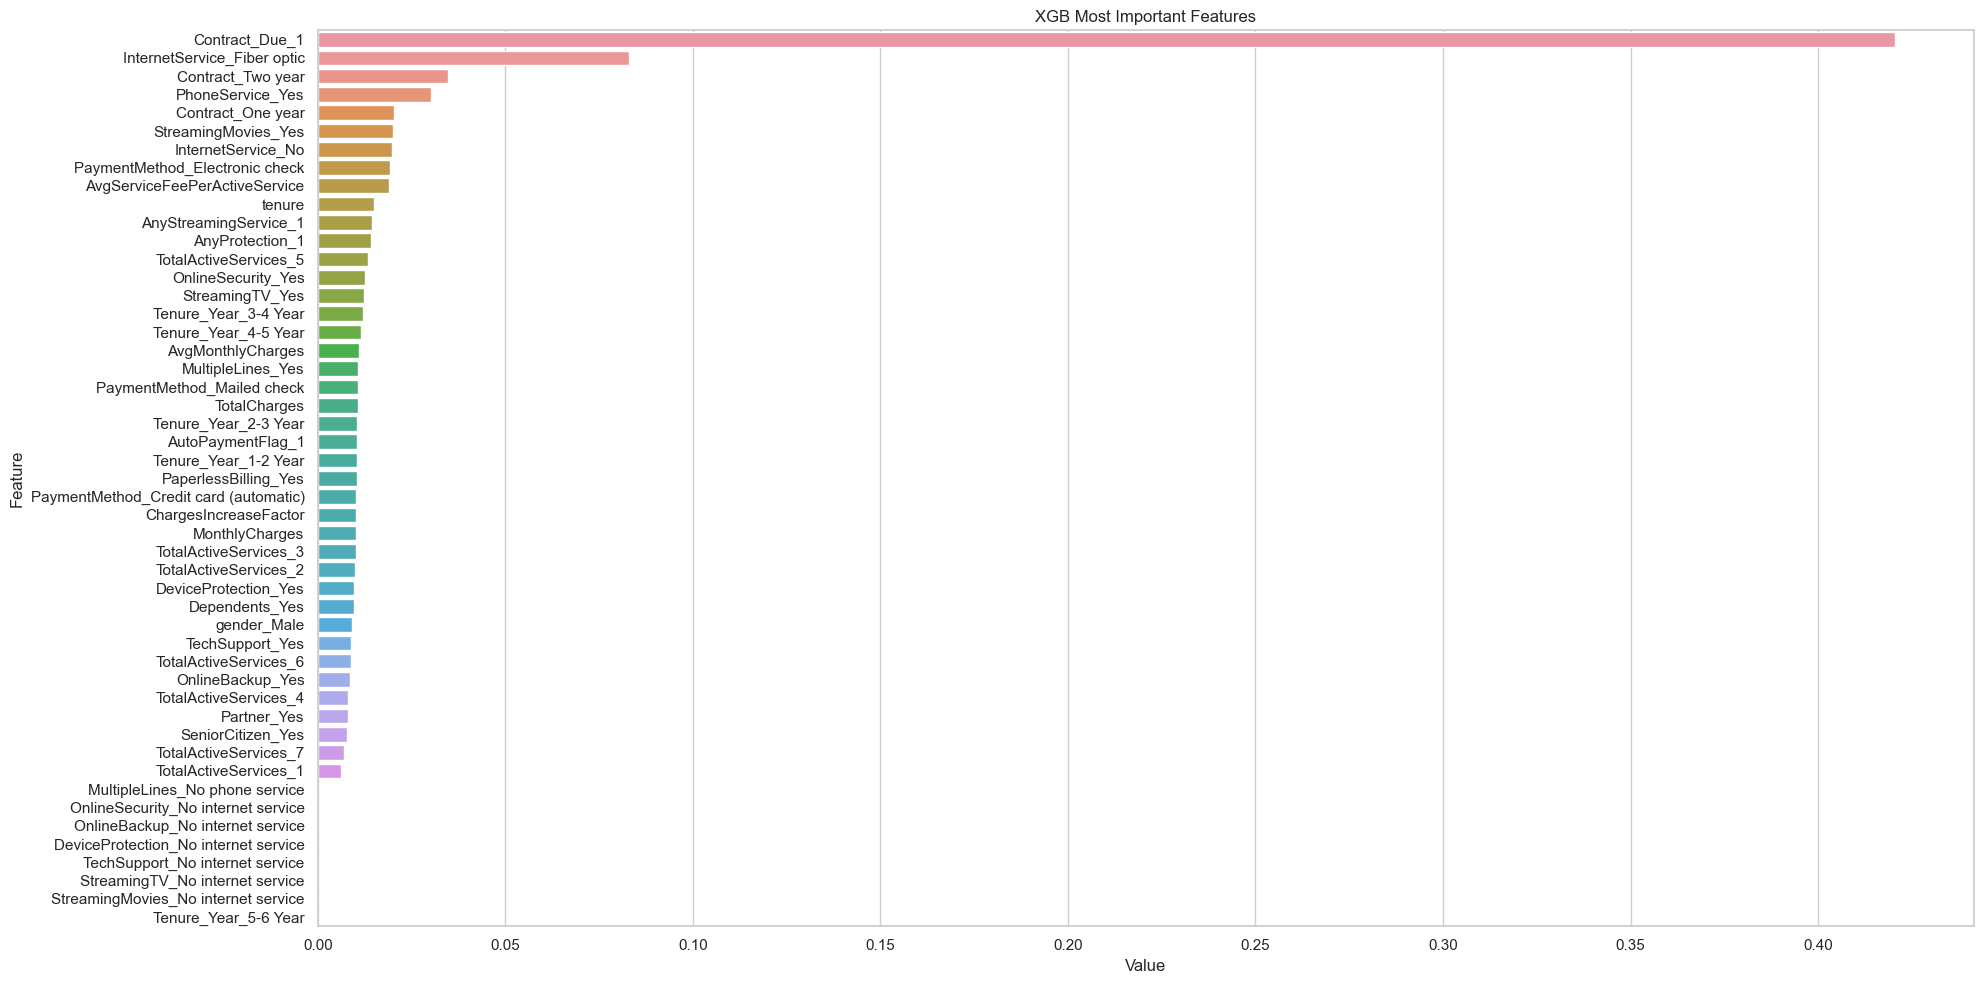

In [50]:
# Plotting feature importance with all variables (49 vars)
plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('XGB Most Important Features')
plt.tight_layout()
plt.show()

#### Second XGBOOST Model with first 41 important features and default parameters

In [51]:
# Select the top 41 important features from X_train
selected_features = feature_imp.head(41)['Feature'].tolist()

# Creating new x dataframes
X_train_2 = X_train[selected_features]
X_test_2 = X_test[selected_features]

In [52]:
# Run the default model with the new feature set
#XGBoost with default parameters
xgb_2 = XGBClassifier(objective='binary:logistic', random_state=1003, eval_metric='auc', scale_pos_weight=scale_pos_weight)
xgb_2.fit(X_train_2, y_train) # fitting with X_train_2

#prediction
y_pred_xgb_2 = xgb_2.predict(X_test_2)

#classification report
print(classification_report(y_test, y_pred_xgb_2))

#confusion matrix
print(confusion_matrix(y_test, y_pred_xgb_2, normalize='true'))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85      1588
           1       0.55      0.69      0.61       525

    accuracy                           0.78      2113
   macro avg       0.72      0.75      0.73      2113
weighted avg       0.80      0.78      0.79      2113

[[0.81297229 0.18702771]
 [0.31428571 0.68571429]]


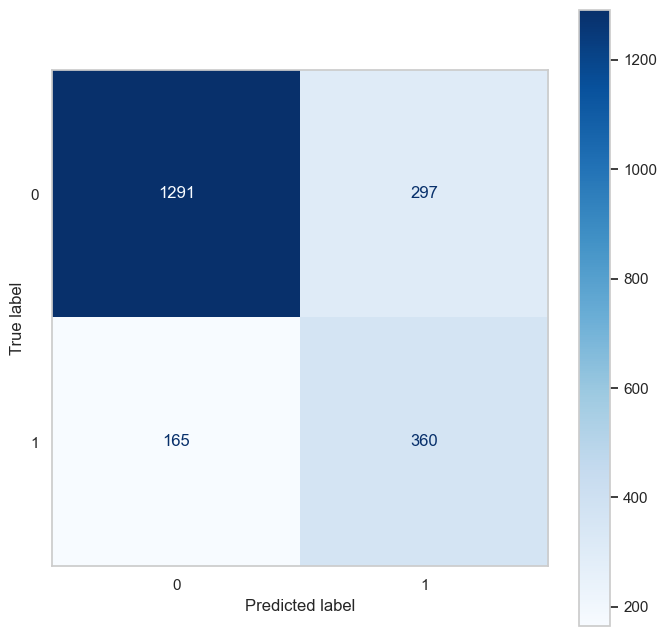

In [53]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb_2)

fig, ax = plt.subplots(figsize=(8, 8))
ax.grid(False)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb.classes_)
disp.plot(cmap=plt.cm.Blues, ax=ax )
plt.show()

In [54]:
# Probas for train
y_train_xgb_proba_2 = xgb_2.predict_proba(X_train_2)[:, 1]  
train_auc = roc_auc_score(y_train, y_train_xgb_proba_2)
print(f'Train AUC: {train_auc}')

# Probas for test
y_pred_xgb_proba_2 = xgb_2.predict_proba(X_test_2)[:, 1]  
test_auc = roc_auc_score(y_test, y_pred_xgb_proba_2)
print(f'Test AUC: {test_auc}')


Train AUC: 0.9949433395081401
Test AUC: 0.8407406741033944


#### Final XGBOOST Model with Hyperparameter Tuning

In [55]:
# Select the top 46 important features from X_train

# Creating new x dataframes
X_train_5 = X_train[selected_features]
X_test_5 = X_test[selected_features]

parameter tuning is a must to get the best parameter values. 
XGBoost is also known as a ‘regularized boosting‘ technique.
XGBoost implements parallel processing and is blazingly faster as compared to Standard GBM.
XGBoost allows users to define custom optimization objectives and evaluation criteria. This adds a whole new dimension to the model and there is no limit to what we can do.

* Built-in Cross-Validation: XGBoost allows the user to run a cross-validation at each iteration of the boosting process and thus, it is easy to get the exact optimum number of boosting iterations in a single run.

The overall parameters have been divided into 3 categories by XGBoost authors:

* General Parameters: Guide the overall functioning
* Booster Parameters: Guide the individual booster (tree/regression) at each step
* Learning Task Parameters: Guide the optimization performed

In [56]:
merged_train = pd.concat([X_train_5, y_train], axis=1)
merged_test = pd.concat([X_test_5, y_test], axis=1)

In [57]:
from sklearn.metrics import accuracy_score, roc_auc_score
import xgboost as xgb

In [58]:
def modelfit(alg, dtrain, dtest, predictors, useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain['Churn'].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
                        metrics='auc', early_stopping_rounds=early_stopping_rounds)

        alg.set_params(n_estimators=cvresult.shape[0])
        
        # Display best iteration information
        print("Best iteration: %d" % (cvresult.shape[0]))
        print("cv-mean: %f" % (cvresult['test-auc-mean'].iloc[-1]))
        print("cv-std: %f" % (cvresult['test-auc-std'].iloc[-1]))
        
    # Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['Churn'], eval_metric='auc')
    
    # Predict training set
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:, 1]
    
    # Print model report
    print("\nModel Report")
    print("Accuracy : %.4g" % accuracy_score(dtrain['Churn'].values, dtrain_predictions))
    print("AUC Score (Train): %f" % roc_auc_score(dtrain['Churn'], dtrain_predprob))
    
    # Predict on testing data
    dtest_predprob = alg.predict_proba(dtest[predictors])[:, 1]
    print('AUC Score (Test): %f' % roc_auc_score(dtest['Churn'], dtest_predprob))
    
    # Plot feature importances
    feat_imp = pd.Series(alg.feature_importances_, index=predictors).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')
    plt.show()

early_stopping_rounds=50, meaning that if the 'auc' metric doesn't improve for 50 consecutive rounds, the training process will stop, and the best model up to that point will be used.

Step 1: Fix the learning rate and number of estimators for tuning tree-based parameters.
* Let’s take the default learning rate of 0.3 here and check the optimum number of trees using the cv function of xgboost.

Best iteration: 43
cv-mean: 0.837421
cv-std: 0.016297

Model Report
Accuracy : 0.8
AUC Score (Train): 0.900532
AUC Score (Test): 0.857705


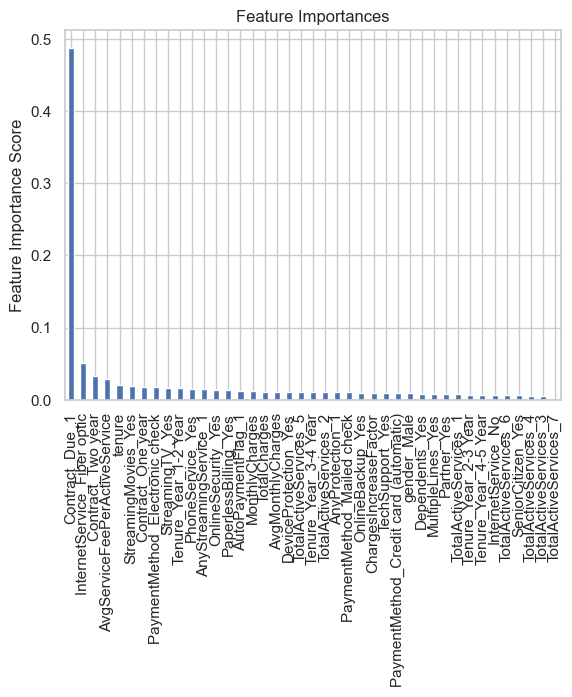

In [59]:
predictors = [x for x in merged_train.columns if x not in ['Churn']]
xgb1 = XGBClassifier(
    learning_rate=0.1,
    n_estimators=200,
    max_depth=5, # This should be between 3-10. I’ve started with 5, but you can choose a different number as well. 4-6 can be good starting points
    min_child_weight=1, # A smaller value is chosen because it is a highly imbalanced class problem, and leaf nodes can have smaller size groups.
    gamma=0, # A smaller value like 0.1-0.2 can also be chosen for starting. This will, anyways, be tuned later.
    subsample=0.8, # This is a commonly used start value. Typical values range between 0.5-0.9.
    colsample_bytree=0.8, # This is a commonly used start value. Typical values range between 0.5-0.9.
    objective='binary:logistic',
    n_jobs=4,
    scale_pos_weight=scale_pos_weight, #Because of high-class imbalance.
    tree_method = 'gpu_hist',
    seed=1003)
modelfit(xgb1, merged_train, merged_test, predictors)

here we got 43 as the optimal estimator for a 0.1 learning rate.

Step 2: Tune max_depth and min_child_weight.
* We tune these first as they will have the highest impact on the model outcome. To start with, let’s set wider ranges, and then we will perform another iteration for smaller ranges.

In [ ]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=43, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic',scale_pos_weight=scale_pos_weight,
 seed=27, tree_method ='gpu_hist'), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4, cv=5)
gsearch1.fit(merged_train[predictors],merged_train['Churn'])
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

Here, we have run 12 combinations with wider intervals between values. The ideal values are 3 for max_depth and 3 for min_child_weight. Let’s go one step deeper and look for optimum values. We’ll search for values 2 above and below the optimum values because we took an interval of four.

In [ ]:
param_test2 = {
 'max_depth':[1,2,3,4,5],
 'min_child_weight':[1,2,3,4,5]
}
gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=43, max_depth=5,
 min_child_weight=5, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', scale_pos_weight= scale_pos_weight, 
 seed=27, tree_method ='gpu_hist'), 
 param_grid = param_test2, scoring='roc_auc',n_jobs=4, cv=5)
gsearch2.fit(merged_train[predictors],merged_train['Churn'])
gsearch2.cv_results_, gsearch2.best_params_, gsearch2.best_score_

({'mean_fit_time': array([0.27485666, 0.24176321, 0.25251231, 0.24649091, 0.24392161,
         0.31177588, 0.31686692, 0.32024231, 0.32160692, 0.3174943 ,
         0.37505417, 0.37752328, 0.37925739, 0.38002601, 0.37610917,
         0.43894973, 0.44647026, 0.44555302, 0.44210815, 0.44287143,
         0.5273591 , 0.52255802, 0.52876325, 0.5215395 , 0.44845634]),
  'std_fit_time': array([0.01821105, 0.05076493, 0.0168558 , 0.01589963, 0.014177  ,
         0.01482957, 0.0140955 , 0.00725958, 0.00998692, 0.00574511,
         0.00794299, 0.00541105, 0.01294256, 0.00439988, 0.00691428,
         0.0057227 , 0.00194205, 0.00540927, 0.01011912, 0.00909406,
         0.00346964, 0.00262832, 0.00559703, 0.00375448, 0.09754054]),
  'mean_score_time': array([0.01310101, 0.01332235, 0.01207762, 0.01332784, 0.01878572,
         0.01841674, 0.01550255, 0.01536245, 0.01520939, 0.01564422,
         0.01486983, 0.01445417, 0.01903467, 0.01464705, 0.01689835,
         0.01756558, 0.01432543, 0.01317368, 0.

Here, we get the optimum values as 4 for max_depth and 2 for min_child_weight. 

Step 3: Tune gamma. 
* Now let’s tune the gamma value using the parameters already tuned above. Gamma can take various values, but I’ll check for 5 values here. You can go into more precise values.

In [ ]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=43, max_depth=4,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', scale_pos_weight= scale_pos_weight, 
 seed=27, tree_method ='gpu_hist'), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=4, cv=5)
gsearch3.fit(merged_train[predictors],merged_train['Churn'])
gsearch3.cv_results_, gsearch3.best_params_, gsearch3.best_score_

({'mean_fit_time': array([0.48161831, 0.4638875 , 0.44634075, 0.44423423, 0.39333158]),
  'std_fit_time': array([0.00744958, 0.02141033, 0.03540816, 0.01932512, 0.08320026]),
  'mean_score_time': array([0.01793633, 0.01603923, 0.01477652, 0.0172792 , 0.0150836 ]),
  'std_score_time': array([0.00075429, 0.00420478, 0.00240138, 0.00200603, 0.00394188]),
  'param_gamma': masked_array(data=[0.0, 0.1, 0.2, 0.3, 0.4],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'gamma': 0.0},
   {'gamma': 0.1},
   {'gamma': 0.2},
   {'gamma': 0.3},
   {'gamma': 0.4}],
  'split0_test_score': array([0.83705255, 0.83658483, 0.83658483, 0.83658483, 0.83658483]),
  'split1_test_score': array([0.83691859, 0.83691859, 0.83691859, 0.83691859, 0.83691859]),
  'split2_test_score': array([0.86339716, 0.86339716, 0.86339716, 0.86339716, 0.86311459]),
  'split3_test_score': array([0.83182198, 0.83182198, 0.83182198, 0.83181679, 0.83179087]),

This shows that value of gamma, i.e., 0.84 is the optimum one. Before proceeding, a good idea would be to re-calibrate the number of boosting rounds for the updated parameters.

Best iteration: 43
cv-mean: 0.838260
cv-std: 0.014584

Model Report
Accuracy : 0.774
AUC Score (Train): 0.875092
AUC Score (Test): 0.856271


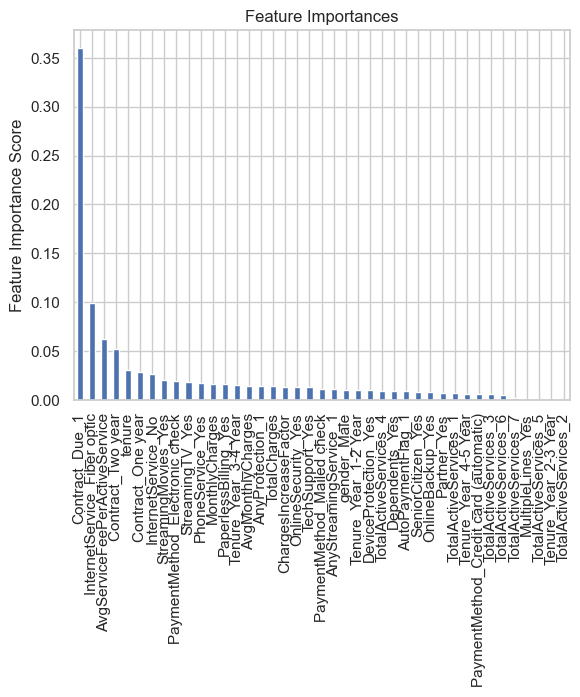

In [ ]:
xgb2 = XGBClassifier(
    learning_rate=0.1,
    n_estimators=43,
    max_depth=4, # This should be between 3-10. I’ve started with 5, but you can choose a different number as well. 4-6 can be good starting points
    min_child_weight=2, # A smaller value is chosen because it is a highly imbalanced class problem, and leaf nodes can have smaller size groups.
    gamma=0.84, # A smaller value like 0.1-0.2 can also be chosen for starting. This will, anyways, be tuned later.
    subsample=0.8, # This is a commonly used start value. Typical values range between 0.5-0.9.
    colsample_bytree=0.8, # This is a commonly used start value. Typical values range between 0.5-0.9.
    objective='binary:logistic',
    n_jobs=4,
    scale_pos_weight=scale_pos_weight, #Because of high-class imbalance.
    tree_method = 'gpu_hist',
    seed=27)

modelfit(xgb2, merged_train, merged_test, predictors)

Best iteration is still 43.

So the final parameters are:

* max_depth: 4
* min_child_weight: 3
* gamma: 0.84

Step 4: Tune subsample and colsample_bytree

The next step would be to try different subsample and colsample_bytree values. Let’s do this in 2 stages as well and take values 0.6,0.7,0.8,0.9 for both to start with.

In [ ]:
param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=43, max_depth=4,
 min_child_weight=2, gamma=0.84, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', scale_pos_weight= scale_pos_weight,
 seed=27, tree_method ='gpu_hist'), 
 param_grid = param_test4, scoring='roc_auc',n_jobs=4, cv=5)
gsearch4.fit(merged_train[predictors],merged_train['Churn'])
gsearch4.cv_results_, gsearch4.best_params_, gsearch4.best_score_

({'mean_fit_time': array([0.45611806, 0.43901958, 0.4425673 , 0.4419013 , 0.43173842,
         0.42859163, 0.44084568, 0.43934698, 0.44092422, 0.44831438,
         0.43989449, 0.43912659, 0.44818964, 0.44450026, 0.44085746,
         0.37924585]),
  'std_fit_time': array([0.01540771, 0.03736457, 0.03881489, 0.04008788, 0.03555459,
         0.04291774, 0.03376   , 0.03784201, 0.03115083, 0.01349469,
         0.01516287, 0.01337163, 0.01180043, 0.0054197 , 0.01260876,
         0.08361628]),
  'mean_score_time': array([0.01430969, 0.01134491, 0.01060028, 0.01316967, 0.0159482 ,
         0.01560473, 0.0115653 , 0.01398954, 0.01304803, 0.01367397,
         0.01550727, 0.01552763, 0.01766748, 0.01730719, 0.01591563,
         0.01361408]),
  'std_score_time': array([0.0045053 , 0.00167353, 0.00370507, 0.00374341, 0.00298858,
         0.00475671, 0.00261886, 0.00272051, 0.00133476, 0.00087518,
         0.00078001, 0.00262338, 0.00127397, 0.00173188, 0.00212149,
         0.00429431]),
  'param_c

optimum values are:

subsample: 0.8
colsample_bytree: 0.8

Step 5: Tuning regularization parameters
* The next step is to apply regularization to reduce overfitting. However, many people don’t use this parameter much as gamma provides a substantial way of controlling complexity. But we should always try it. I’ll tune the ‘reg_alpha’ value here and different values of ‘reg_lambda’.

In [ ]:
param_test5 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch5 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=43, max_depth=4,
 min_child_weight=2, gamma=0.84, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', scale_pos_weight= scale_pos_weight, 
 seed=27, tree_method ='gpu_hist'), 
 param_grid = param_test5, scoring='roc_auc',n_jobs=4, cv=5)
gsearch5.fit(merged_train[predictors],merged_train['Churn'])
gsearch5.cv_results_, gsearch5.best_params_, gsearch5.best_score_

({'mean_fit_time': array([0.47321715, 0.46555266, 0.4571486 , 0.44239383, 0.39489188]),
  'std_fit_time': array([0.00415787, 0.00733021, 0.02611286, 0.0486648 , 0.05396348]),
  'mean_score_time': array([0.00867949, 0.0129643 , 0.01064115, 0.01726022, 0.01363196]),
  'std_score_time': array([0.00359544, 0.00382548, 0.00289558, 0.00291134, 0.00447081]),
  'param_reg_alpha': masked_array(data=[1e-05, 0.01, 0.1, 1, 100],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'reg_alpha': 1e-05},
   {'reg_alpha': 0.01},
   {'reg_alpha': 0.1},
   {'reg_alpha': 1},
   {'reg_alpha': 100}],
  'split0_test_score': array([0.83466459, 0.83514271, 0.83504397, 0.83447751, 0.83761901]),
  'split1_test_score': array([0.83763668, 0.83763409, 0.84002426, 0.83664899, 0.82727235]),
  'split2_test_score': array([0.8632131 , 0.86312496, 0.8615125 , 0.86289424, 0.8496731 ]),
  'split3_test_score': array([0.83180124, 0.83190493, 0.83128017,

In [ ]:
param_test5 = {
 'reg_lambda':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch5 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=43, max_depth=4,
 min_child_weight=2, gamma=0.84, subsample=0.8, colsample_bytree=0.8, reg_alpha = 0.01,
 objective= 'binary:logistic', scale_pos_weight= scale_pos_weight, 
 seed=27, tree_method ='gpu_hist'), 
 param_grid = param_test5, scoring='roc_auc',n_jobs=4, cv=5)
gsearch5.fit(merged_train[predictors],merged_train['Churn'])
gsearch5.cv_results_, gsearch5.best_params_, gsearch5.best_score_

({'mean_fit_time': array([0.46838322, 0.44499345, 0.43940945, 0.4489923 , 0.41301556]),
  'std_fit_time': array([0.01328423, 0.03827262, 0.03669261, 0.01576907, 0.05530921]),
  'mean_score_time': array([0.01202917, 0.01126122, 0.01395888, 0.01557689, 0.01240077]),
  'std_score_time': array([0.00209873, 0.00354746, 0.00200818, 0.00179167, 0.00605671]),
  'param_reg_lambda': masked_array(data=[1e-05, 0.01, 0.1, 1, 100],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'reg_lambda': 1e-05},
   {'reg_lambda': 0.01},
   {'reg_lambda': 0.1},
   {'reg_lambda': 1},
   {'reg_lambda': 100}],
  'split0_test_score': array([0.83483349, 0.83486987, 0.83228184, 0.83514271, 0.83585468]),
  'split1_test_score': array([0.83709747, 0.83710265, 0.83632494, 0.83763409, 0.8380722 ]),
  'split2_test_score': array([0.86070108, 0.86071145, 0.8621917 , 0.86312496, 0.85894604]),
  'split3_test_score': array([0.83161718, 0.83163792, 0.832

optimum values: 
* reg_alpha : 0.1 
* reg_lambda :1

You can see that we got a better CV. Now we can apply this regularization in the model and look at the impact:

Best iteration: 43
cv-mean: 0.838606
cv-std: 0.014717

Model Report
Accuracy : 0.7771
AUC Score (Train): 0.875473
AUC Score (Test): 0.855795


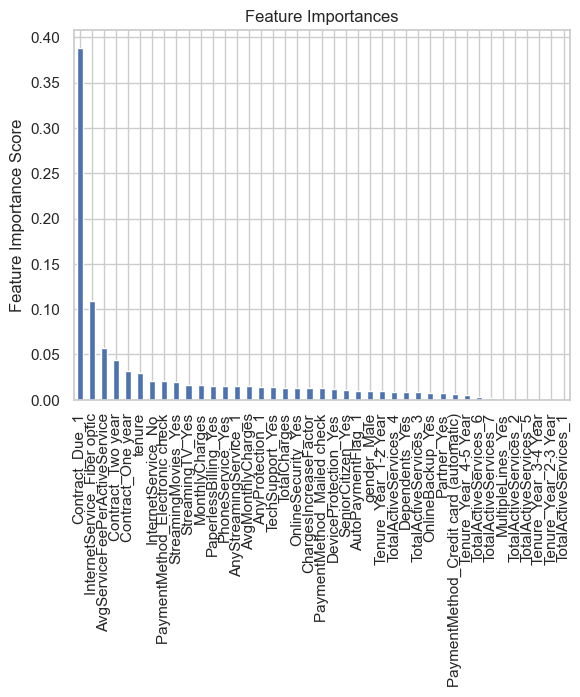

In [ ]:
xgb3 = XGBClassifier(
    learning_rate=0.1,
    n_estimators=43,
    max_depth=4, # This should be between 3-10. I’ve started with 5, but you can choose a different number as well. 4-6 can be good starting points
    min_child_weight=2, # A smaller value is chosen because it is a highly imbalanced class problem, and leaf nodes can have smaller size groups.
    gamma=0.84, # A smaller value like 0.1-0.2 can also be chosen for starting. This will, anyways, be tuned later.
    subsample=0.8, # This is a commonly used start value. Typical values range between 0.5-0.9.
    colsample_bytree=0.8, # This is a commonly used start value. Typical values range between 0.5-0.9.
    objective='binary:logistic',
    n_jobs=4,
    reg_alpha = 0.1,
    reg_lambda = 1,
    scale_pos_weight=scale_pos_weight, #Because of high-class imbalance.
    tree_method = 'gpu_hist',
    seed=27)

modelfit(xgb3, merged_train, merged_test, predictors)

Step 6: Reducing the learning rate and final calibration on parameters
* Lastly, we should lower the learning rate and add more trees. Let’s use the cv function of XGBoost to do the job again.

Best iteration: 43
cv-mean: 0.835453
cv-std: 0.012175

Model Report
Accuracy : 0.758
AUC Score (Train): 0.851375
AUC Score (Test): 0.851298


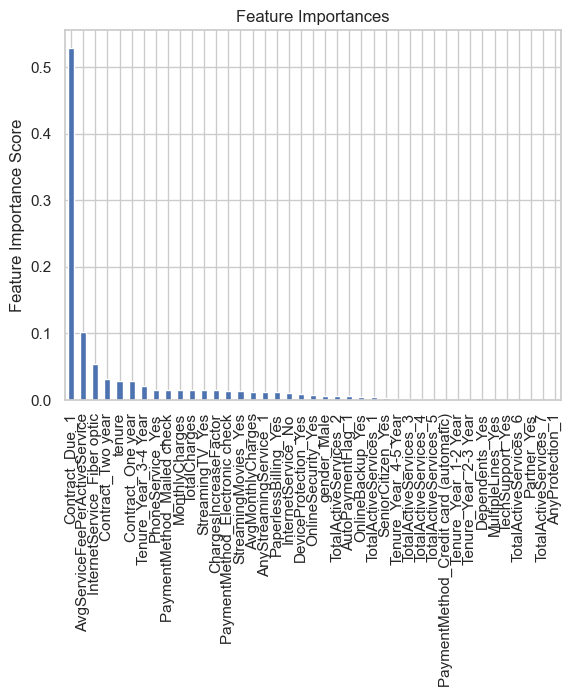

In [ ]:
xgb4 = XGBClassifier(
    learning_rate=0.01,
    n_estimators=43,
    max_depth=4, # This should be between 3-10. I’ve started with 5, but you can choose a different number as well. 4-6 can be good starting points
    min_child_weight=2, # A smaller value is chosen because it is a highly imbalanced class problem, and leaf nodes can have smaller size groups.
    #gamma=0.84, # A smaller value like 0.1-0.2 can also be chosen for starting. This will, anyways, be tuned later.
    subsample=0.8, # This is a commonly used start value. Typical values range between 0.5-0.9.
    colsample_bytree=0.8, # This is a commonly used start value. Typical values range between 0.5-0.9.
    objective='binary:logistic',
    n_jobs=4,
    #reg_alpha = 0.1,
    #reg_lambda = 1,
    scale_pos_weight=scale_pos_weight, #Because of high-class imbalance.
    tree_method = 'gpu_hist',
    seed=27)

modelfit(xgb4, merged_train, merged_test, predictors)

In [61]:
# Fine Tuned Model
#XGBoost with default parameters
xgb_4 = XGBClassifier(learning_rate=0.01,
    n_estimators=43,
    max_depth=5, 
    min_child_weight=5, 
    gamma=0.84, 
    subsample=0.8,
    colsample_bytree=0.8, 
    objective='binary:logistic',
    n_jobs=4,
    reg_alpha = 0.1,
    reg_lambda = 1,
    scale_pos_weight=scale_pos_weight, #Because of high-class imbalance.
    tree_method = 'gpu_hist',
    seed=27)

xgb_4.fit(X_train[predictors], y_train) 

#prediction
y_pred_xgb_4 = xgb_4.predict(X_test[predictors])

#classification report
print(classification_report(y_test, y_pred_xgb_4))

#confusion matrix
print(confusion_matrix(y_test, y_pred_xgb_4))

              precision    recall  f1-score   support

           0       0.93      0.74      0.82      1588
           1       0.51      0.82      0.63       525

    accuracy                           0.76      2113
   macro avg       0.72      0.78      0.72      2113
weighted avg       0.82      0.76      0.77      2113

[[1173  415]
 [  95  430]]


In [63]:
# Probas for train
y_train_xgb_proba_4 = xgb_4.predict_proba(X_train[predictors])[:, 1]  
train_auc = roc_auc_score(y_train, y_train_xgb_proba_4)
print(f'Train AUC: {train_auc}')

# Probas for test
y_pred_xgb_proba_4 = xgb_4.predict_proba(X_test[predictors])[:, 1]  
test_auc = roc_auc_score(y_test, y_pred_xgb_proba_4)
print(f'Test AUC: {test_auc}')

Train AUC: 0.8644045834661249
Test AUC: 0.8546725440806046


Shapley Values For Tuned XGBoost Model

In [86]:
mybooster = xgb_4.get_booster()

model_bytearray = mybooster.save_raw()[4:]
def myfun(self=None):
    return model_bytearray

In [87]:
explainer = shap.TreeExplainer(mybooster)
shap_values = explainer.shap_values(X_train[predictors])

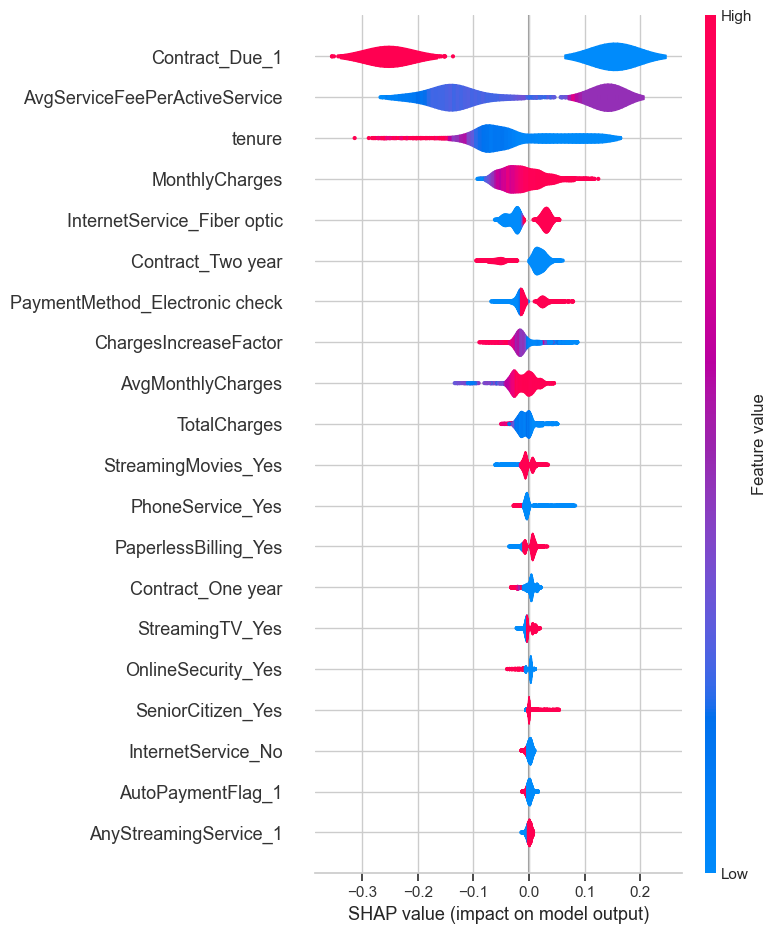

In [88]:
shap.summary_plot(shap_values, X_train[predictors], plot_type='violin')

#### First LIGHTGBM Model With Default Parameters

In [67]:
# Default Parameter
lgbclf = lgb.LGBMClassifier(
  random_state=1003,
  scale_pos_weight=scale_pos_weight,
  metric='auc',
  objective= 'binary',
  device = 'gpu')
lgbclf.fit(X_train,y_train)

#prediction
y_pred_lgbm = lgbclf.predict(X_test)

# Probas for train
y_train_lgbm_proba = lgbclf.predict_proba(X_train)[:, 1]  

#classification report
print(classification_report(y_test, y_pred_lgbm))

#confusion matrix
print(confusion_matrix(y_test, y_pred_lgbm, normalize='true'))



[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1344, number of negative: 3586
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1434
[LightGBM] [Info] Number of data points in the train set: 4930, number of used features: 49
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3070 Laptop GPU, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 23 dense feature groups (0.11 MB) transferred to GPU in 0.002165 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.272617 -> initscore=-0.981387
[LightGBM] [Info] Start training from score -0.981387
              precision    recall  f1-score   support

           0       0.90      0.77      0.83      1588
           1       0.52      0.74      0.61       525

    accuracy    

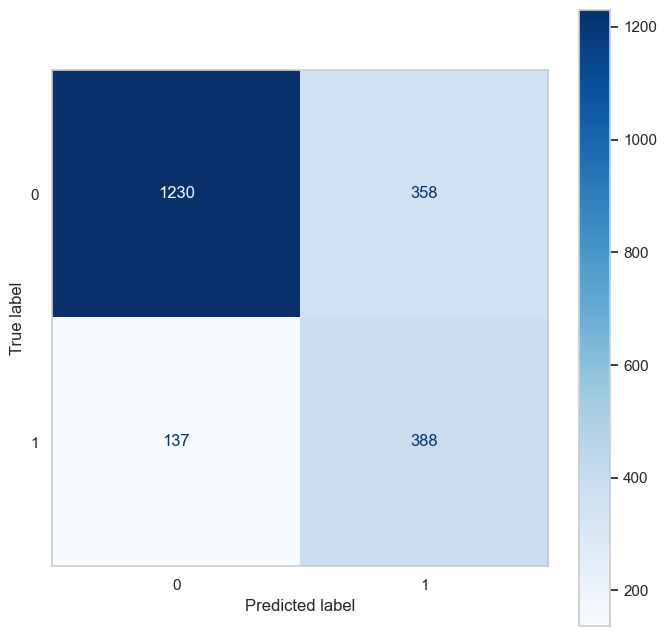

In [68]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_lgbm)

fig, ax = plt.subplots(figsize=(8, 8))
ax.grid(False)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lgbclf.classes_)
disp.plot(cmap=plt.cm.Blues, ax=ax )
plt.show()

In [69]:
train_auc = roc_auc_score(y_train, y_train_lgbm_proba)
print(f'Train AUC: {train_auc}')

# Probas for test
y_test_lgbm_proba = lgbclf.predict_proba(X_test)[:, 1]  
test_auc = roc_auc_score(y_test, y_test_lgbm_proba)
print(f'Test AUC: {test_auc}')

Train AUC: 0.9636968667835231
Test AUC: 0.8488646995322058


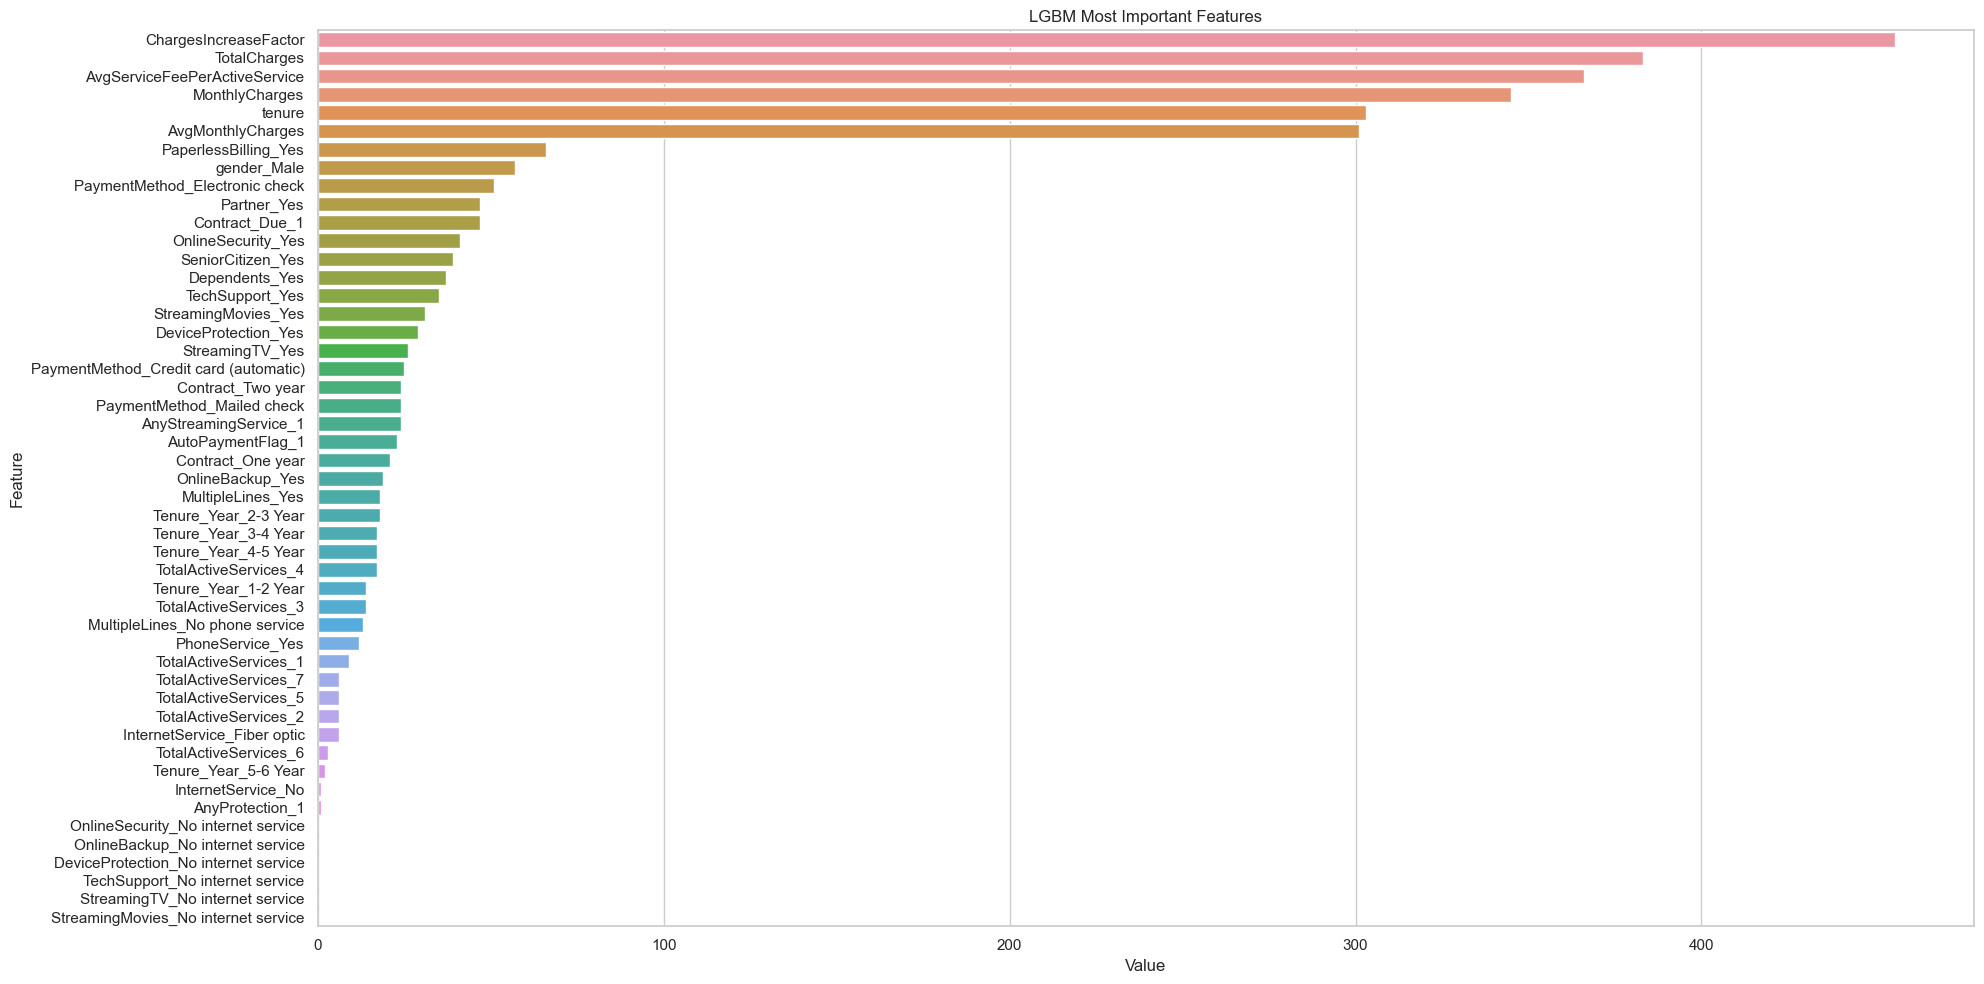

In [70]:
# Feature Importance
cols = list( X_train.columns)
feature_imp = pd.DataFrame(sorted(zip(lgbclf.feature_importances_, cols), key=lambda x: x[0], reverse=True), columns=['Value', 'Feature'])
feature_imp.to_clipboard()
len(X_train.columns)
# Plotting feature importance with all variables (49 vars)
plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LGBM Most Important Features')
plt.tight_layout()
plt.show()

#### Second LIGHTGBM Model with first 41 important features and default parameters

In [612]:
# Select the top 39 important features from X_train
selected_features = feature_imp.head(39)['Feature'].tolist()

# Creating new x dataframes
X_train_2 = X_train[selected_features]
X_test_2 = X_test[selected_features]

In [625]:
# Run the default model with the new feature set
#LightGBM with default parameters
lgb_2 = LGBMClassifier(objective= 'binary', random_state=1003, metric='auc', scale_pos_weight=scale_pos_weight)
lgb_2.fit(X_train_2, y_train) # fitting with X_train_2

#prediction
y_pred_lgb_2 = lgb_2.predict(X_test[selected_features])

#classification report
print(classification_report(y_test, y_pred_lgb_2))

#confusion matrix
print(confusion_matrix(y_test, y_pred_lgb_2, normalize='true'))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1344, number of negative: 3586
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000665 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1414
[LightGBM] [Info] Number of data points in the train set: 4930, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.272617 -> initscore=-0.981387
[LightGBM] [Info] Start training from score -0.981387
              precision    recall  f1-score   support

           0       0.90      0.77      0.83      1588
           1       0.52      0.75      0.62       525

    accuracy                           0.77      2113
   macro avg       0.71      0.76      0.72      2113
weighted avg       0.81      0.77      0.78      2113

[[0.77455919 0.22544081]
 [0.25142857 0.74857143]]


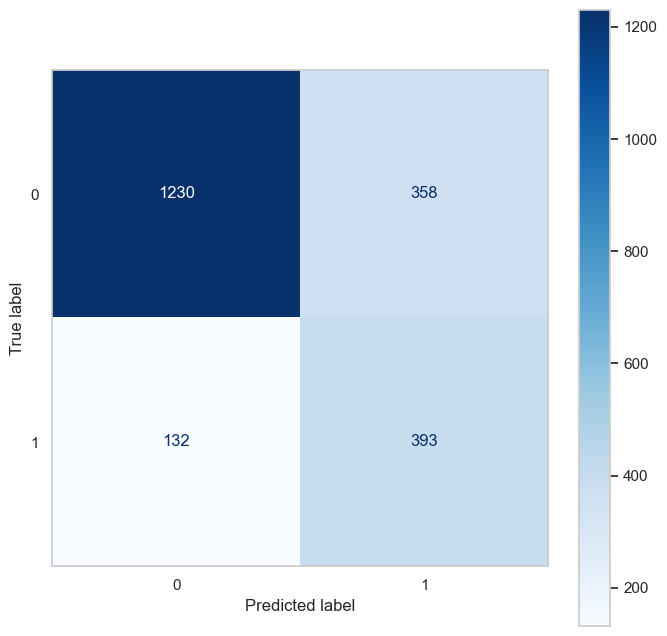

In [626]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_lgb_2)

fig, ax = plt.subplots(figsize=(8, 8))
ax.grid(False)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lgb_2.classes_)
disp.plot(cmap=plt.cm.Blues, ax=ax )
plt.show()

In [628]:
# Probas for train
y_train_lgb_proba_2 = lgb_2.predict_proba(X_train[selected_features])[:, 1]  
train_auc = roc_auc_score(y_train, y_train_lgb_proba_2)
print(f'Train AUC: {train_auc}')

# Probas for test
y_pred_lgb_proba_2 = lgb_2.predict_proba(X_test[selected_features])[:, 1]  
test_auc = roc_auc_score(y_test, y_pred_lgb_proba_2)
print(f'Test AUC: {test_auc}')


Train AUC: 0.9656999442275516
Test AUC: 0.8502147055295669


#### Final LIGHTGBM Model with Hyperparameter Tuning

In [629]:
params={
 "learning_rate"    : [0.01, 0.05, 0.10, 0.15 ] ,
 "max_depth"        : [ 1,2,3,4,5,6],
 "num_leaves"       : [ 10, 20, 30, 40, 50],
 "n_estimators"     : [ 10, 20, 30, 40, 50, 100],
 "subsample"        : [ 0.1, 0.2, 0.3, 0.4, 0.5 , 0.7 , 0.8 , 0.9],
 "reg_alpha"        : [ 0.1, 0.3 , 0.6, 1 ],
 "colsample_bytree" : [ 0.1, 0.2, 0.3, 0.4, 0.5 , 0.7 , 0.8 , 0.9 ]
    
}
from sklearn.model_selection import RandomizedSearchCV

lgbclf = lgb.LGBMClassifier()

random_search=RandomizedSearchCV(
  lgbclf,
  param_distributions=params,
  n_iter=10,
  scoring='roc_auc',
  n_jobs=-1,
  cv=5,
  verbose=3)

random_search.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1344, number of negative: 3586
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000237 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1434
[LightGBM] [Info] Number of data points in the train set: 4930, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.272617 -> initscore=-0.981387
[LightGBM] [Info] Start training from score -0.981387
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig

RandomizedSearchCV(cv=5, estimator=LGBMClassifier(), n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.1, 0.2, 0.3, 0.4,
                                                             0.5, 0.7, 0.8,
                                                             0.9],
                                        'learning_rate': [0.01, 0.05, 0.1,
                                                          0.15],
                                        'max_depth': [1, 2, 3, 4, 5, 6],
                                        'n_estimators': [10, 20, 30, 40, 50,
                                                         100],
                                        'num_leaves': [10, 20, 30, 40, 50],
                                        'reg_alpha': [0.1, 0.3, 0.6, 1],
                                        'subsample': [0.1, 0.2, 0.3, 0.4, 0.5,
                                                      0.7, 0.8, 0.9]},
                   scoring='roc_auc', verbose=3)

In [630]:
random_search.best_params_

{'subsample': 0.9,
 'reg_alpha': 0.6,
 'num_leaves': 20,
 'n_estimators': 20,
 'max_depth': 4,
 'learning_rate': 0.1,
 'colsample_bytree': 0.2}

In [631]:
random_search.best_estimator_

LGBMClassifier(colsample_bytree=0.2, max_depth=4, n_estimators=20,
               num_leaves=20, reg_alpha=0.6, subsample=0.9)

In [71]:
# Tuned Model
lgbclf_3 = lgb.LGBMClassifier(
        random_state=1003,
        scale_pos_weight=scale_pos_weight,
        metric='auc',
        objective= 'binary',
        subsample= 0.8,
        colsample_bytree= 0.8,
        learning_rate= 0.01,
        max_depth= 5
    )

lgbclf_3.fit(X_train[selected_features],y_train)

#prediction
y_pred_lgbm_3 = lgbclf_3.predict(X_test[selected_features])

# Probas for train
y_train_lgbm_proba_3 = lgbclf_3.predict_proba(X_train[selected_features])[:, 1]  
train_auc = roc_auc_score(y_train, y_train_lgbm_proba_3)
print(f'Train AUC: {train_auc}')

# Probas for test
y_test_lgbm_proba_3 = lgbclf_3.predict_proba(X_test[selected_features])[:, 1]  
test_auc = roc_auc_score(y_test, y_test_lgbm_proba_3)
print(f'Test AUC: {test_auc}')

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 1344, number of negative: 3586
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001150 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1418
[LightGBM] [Info] Number of data points in the train set: 4930, number of used features: 41
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.272617 -> initscore=-0.981387
[LightGBM] [Info] Start training from score -0.981387
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning

Shapley Values For Tuned XGBoost Model

In [90]:
explainer = shap.TreeExplainer(lgbclf_3)
shap_values = explainer.shap_values(X_train[predictors])

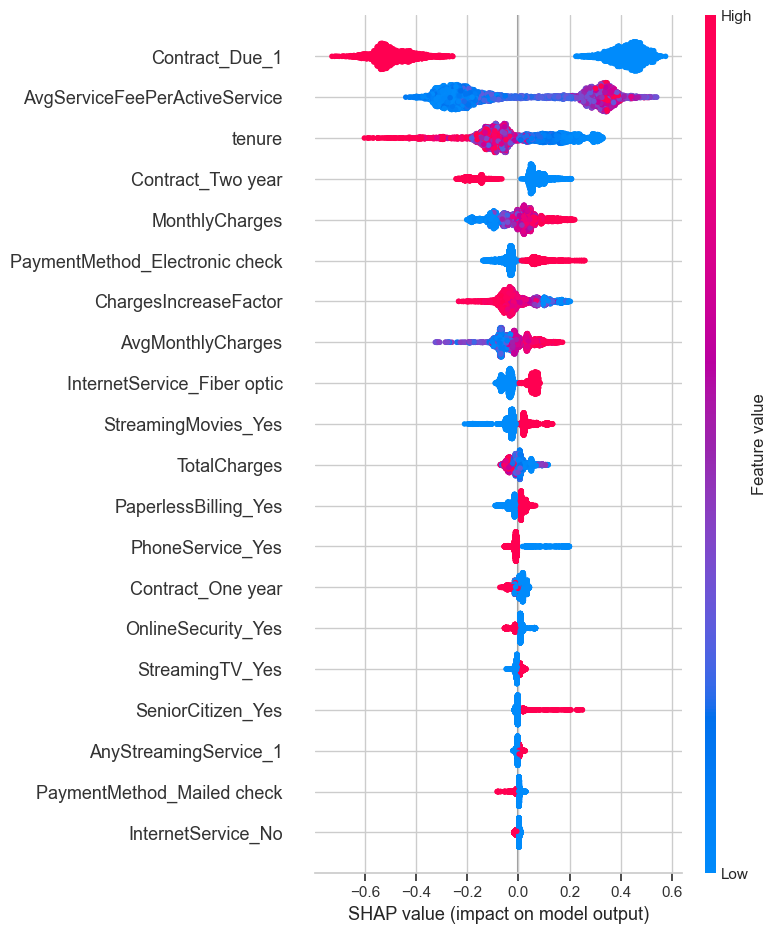

In [96]:
shap.summary_plot(shap_values[1], X_train[predictors])

In [72]:
#classification report
print(classification_report(y_test, y_pred_lgbm_3))

#confusion matrix
print(confusion_matrix(y_test, y_pred_lgbm_3, normalize='true'))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      1588
           1       0.60      0.66      0.63       525

    accuracy                           0.81      2113
   macro avg       0.74      0.76      0.75      2113
weighted avg       0.81      0.81      0.81      2113

[[0.85516373 0.14483627]
 [0.34285714 0.65714286]]


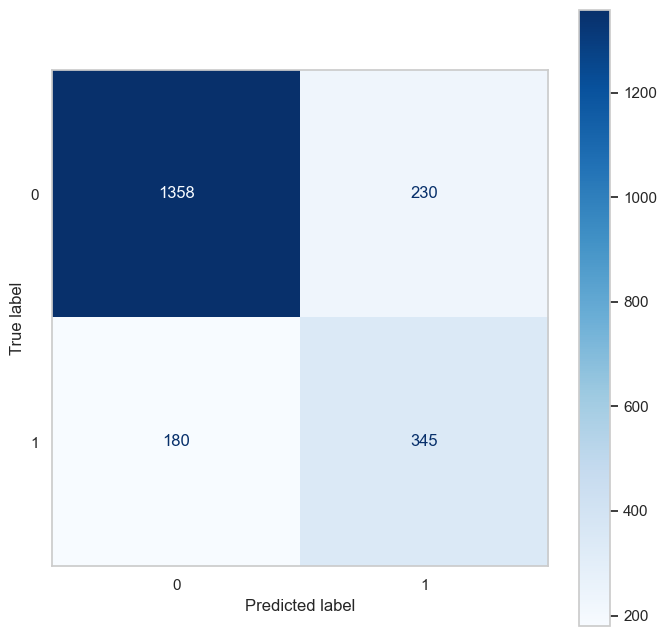

In [73]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_lgbm_3)

fig, ax = plt.subplots(figsize=(8, 8))
ax.grid(False)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lgbclf_3.classes_)
disp.plot(cmap=plt.cm.Blues, ax=ax )
plt.show()